In [1]:
import pandas as pd
import os
import numpy as np
import missingno as msno

# Read in data

### Hourly data

In [2]:
import os
import pandas as pd

folder_path = '../data/hourly_all'  

dataframes = {}  # Dictionary to store the dataframes

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        dataframe_name = filename.replace(' ', '_').rstrip('.csv')

        file_path = os.path.join(folder_path, filename)
        dataframe = pd.read_csv(file_path, parse_dates=['Date / Time'])  # Parse 'Date / Time' as datetime

        print('Reading: ', dataframe_name)
        
        # Set 'Date / Time' as index
        dataframe.set_index('Date / Time', inplace=True)

        # Store the dataframe in the dictionary
        dataframes[dataframe_name] = dataframe

Reading:  Engineering_Science_Building_Electric_Consumption
Reading:  ESB_CH_DP
Reading:  ESB_Tower_2_Optim
Reading:  ESB_CH_kW_ton
Reading:  ESB_Chiller_Plant_efficiency_vs_load
Reading:  Cooling_Tower_2
Reading:  ESB_HVAC_Control_1
Reading:  Cooling_Tower_1
Reading:  ESB_CH1_Motor_Temp
Reading:  ESB_Tower_1_Optim
Reading:  ESB_Tower_1_efficiency-approach
Reading:  ESB_Tower_2_Information
Reading:  Python_CDW_Control
Reading:  ESB_Chiller_2
Reading:  test_steam_data
Reading:  ESB_Tower_1_Information
Reading:  ESB_Low_Load_Analysi
Reading:  ESB_Chiller_1_Dashboard
Reading:  ESB_Bldg_Cooling_Load
Reading:  ESB_CH_Oil_Data
Reading:  ESB_Chiller_1_Information
Reading:  ESB_Tower_1_Dashboard
Reading:  Engineering_Science_Building_Steam_Consumption
Reading:  ESB_Daily_Energy_(kBtu)
Reading:  ESB_CH1_DP_v_Load
Reading:  ESB_Daily_Energy_(kBtu)_vs_OAT_(F)
Reading:  ESB_Tower_2_efficiency-approach
Reading:  ESB_Chilled_Water_System
Reading:  ESB_1_efficiency
Reading:  CDW_Stpt_Compare
Reading:

In [3]:
ESB_Chiller_1_select = ['ESB_Chiller_1 chillerEvapWaterFlow',
       'ESB_Chiller_1 chwSupplyTempSetpoint', 'ESB_Chiller_1 inAlarm','ESB_Chiller_1 chillerCondEnteringWaterTemp',
       'ESB_Chiller_1 chillerTotalKw',
       'ESB_Chiller_1 chillerEvapLeavingWaterTemp',
       'ESB_Chiller_1 tonnage', 'ESB_Chiller_1 outdoorAirTemp','ESB_Chiller_1 chillerCondWaterFlow',
       'ESB_Chiller_1 chillerEvapDifferentialPress',
       'ESB_Chiller_1 chillerCondDifferentialPress',
       'ESB_Chiller_1 runningCapacity',
       'ESB_Chiller_1 chillerEvapEnteringWaterTemp', 'ESB_Chiller_1 chillerCondLeavingWaterTemp','ESB_Chiller_1 chillerStatus']
ESB_CH1_DP_v_Load_select = ['ESB_Chiller_2 chillerEvapDifferentialPress','ESB_Chiller_2 chillerCondDifferentialPress',
                            'ESB_Chiller_2 percentRefrigerationLoad','ESB_CWP_1 pumpVfdPercent', 'ESB_Chiller_1 percentRefrigerationLoad']
ESB_CH2_DP_v_Load_select = ['ESB_CWP_2 pumpVfdPercent']
ESB_Chiller_2_select = ['ESB_Chiller_2 chwSupplyTempSetpoint', 'ESB_Chiller_2 tonnage',
       'ESB_Chiller_2 runningCapacity',
       'ESB_Chiller_2 chillerEvapEnteringWaterTemp',
       'ESB_Chiller_2 chillerTotalKw',
       'ESB_Chiller_2 chillerEvapDifferentialPress',
       'ESB_Chiller_2 chillerCondLeavingWaterTemp',
       'ESB_Chiller_2 chillerCondEnteringWaterTemp',
       'ESB_Chiller_2 chillerCondWaterFlow', 'ESB_Chiller_2 chillerStatus',
       'ESB_Chiller_2 outdoorAirTemp', 'ESB_Chiller_2 chillerEvapWaterFlow',
       'ESB_Chiller_2 chillerEvapLeavingWaterTemp']
ESB_Chilled_Water_System_select = ['SCHWP_Building_Load Value', 'CH2_Chilled_Water_Flow Value',
       'CH1_Load_Tons Value', 'Device_7060_Pump_1_Flow Value',
       'Device_7057_Pump_1_Flow Value', 'Chiller_1_Comp_Runtime Value',
       'SCHWP_SCHW_Flow Value', 'SCHWP_Campus_CHW_Load Value',
       'SCHWP_Building_Load_Percent Value', 'Chiller_2_Comp_Runtime Value',
       'Active_Chiller_Load_Percent Value', 'Chiller_1_Percent_Load Value',
       'Primary_CHW_Flow Value', 'CH2_Load_Btuh Value',
       'CH1_Chilled_Water_Flow Value', 'Chiller_Capacity Value',
       'Building_Load Value', 'Device_7060_Pump_2_Flow Value',
       'SCHWP_Active_Chiller_Load Value', 'Bldg_Load_Btuh Value','CH2_Load_Tons Value', 'Device_7062_Pump_1_Flow Value',
       'Device_7062_Pump_2_Flow Value', 'SCHWP_SCHW_Load Value',
       'Device_7057_Pump_2_Flow Value', 'C1_Load_Btuh Value',
       'Chiller_2_Percent_Load Value','SCHWP_Campus_CHW_Supply_SP Value']
ESB_CH_Oil_Data_select = ['CH1_Oil_Pump_Disch_Press_AI_31', 'CH1_Oil_Tank_Press_AI_30', 'CH1_OilTankTemp_AI_33',
       'CH2_Oil_Tank_Press_AI_30', 'CH2_OilTankTemp_AI_33','CH2_Oil_Pump_Disch_Press_AI_31']
ESB_Chiller_Efficiency_select = ['ESB_Chiller_1 efficiency', 'ESB_Chiller_2 efficiency',
       'ESB Chiller Plant plantEfficiency', 'ESB Chiller Plant plantRefrigerationLoad']
ESB_Chiller_Plant_efficiency_vs_load_select = ['Plant Percent Load', 'ESB_Chiller_2 Demand','ESB_Chiller_1 Demand']
Chilled_Water_System_ESB_CHWS_Low_Delta_T_select = ['ESB CHWS.CWS Supply Temp']

In [4]:
def merge_selected_features(df, select_list, merged_df):
    df_select = df.loc[:, select_list].drop_duplicates(keep='first')
    common_columns = merged_df.columns.intersection(select_list)
    df_select = df_select.drop(columns=common_columns)
    merged_df = merged_df.join(df_select, how='left')
    return merged_df

In [5]:
chiller_df = dataframes['ESB_Chiller_1'].loc[:, ESB_Chiller_1_select]
chiller_df = merge_selected_features(dataframes['ESB_CH1_DP_v_Load'], ESB_CH1_DP_v_Load_select, chiller_df)
chiller_df = merge_selected_features(dataframes['ESB_CH2_DP_v_Load'], ESB_CH2_DP_v_Load_select, chiller_df)
chiller_df = merge_selected_features(dataframes['ESB_Chiller_2'], ESB_Chiller_2_select, chiller_df)
chiller_df = merge_selected_features(dataframes['ESB_Chilled_Water_System'], ESB_Chilled_Water_System_select, chiller_df)
chiller_df = merge_selected_features(dataframes['ESB_CH_Oil_Data'], ESB_CH_Oil_Data_select, chiller_df)
chiller_df = merge_selected_features(dataframes['ESB_Chiller_Efficiency'], ESB_Chiller_Efficiency_select, chiller_df)
chiller_df = merge_selected_features(dataframes['ESB_Chiller_Plant_efficiency_vs_load'], ESB_Chiller_Plant_efficiency_vs_load_select, chiller_df)
chiller_df = merge_selected_features(dataframes['Chilled_Water_System_ESB_CHWS_Low_Delta_T'], Chilled_Water_System_ESB_CHWS_Low_Delta_T_select, chiller_df)

In [6]:
chiller_df

,ESB_Chiller_1 chillerEvapWaterFlow,ESB_Chiller_1 chwSupplyTempSetpoint,ESB_Chiller_1 inAlarm,ESB_Chiller_1 chillerCondEnteringWaterTemp,ESB_Chiller_1 chillerTotalKw,ESB_Chiller_1 chillerEvapLeavingWaterTemp,ESB_Chiller_1 tonnage,ESB_Chiller_1 outdoorAirTemp,ESB_Chiller_1 chillerCondWaterFlow,ESB_Chiller_1 chillerEvapDifferentialPress,...,CH2_OilTankTemp_AI_33,CH2_Oil_Pump_Disch_Press_AI_31,ESB_Chiller_1 efficiency,ESB_Chiller_2 efficiency,ESB Chiller Plant plantEfficiency,ESB Chiller Plant plantRefrigerationLoad,Plant Percent Load,ESB_Chiller_2 Demand,ESB_Chiller_1 Demand,ESB CHWS.CWS Supply Temp
Date / Time,,,,,,,,,,,,,,,,,,,,,
2019-05-11 00:00:00,0.00,42.0,False,74.52,0.0,49.97,NaN,57.61,0.0,-0.0629,...,NaN,NaN,NaN,NaN,0.6248,12.68,12.68,NaN,NaN,41.91
2019-05-11 01:00:00,0.00,42.0,False,74.52,0.0,49.85,NaN,57.24,0.0,-0.0787,...,NaN,NaN,NaN,NaN,0.6380,12.42,12.42,NaN,NaN,42.22
2019-05-11 02:00:00,0.00,42.0,False,74.52,0.0,50.06,NaN,57.30,0.0,-0.0738,...,NaN,NaN,NaN,NaN,0.7293,11.93,11.93,NaN,NaN,42.03
2019-05-11 03:00:00,0.00,42.0,False,74.52,0.0,50.06,NaN,57.30,0.0,-0.0777,...,NaN,NaN,NaN,NaN,0.6303,13.07,13.07,NaN,NaN,41.98
2019-05-11 04:00:00,0.00,42.0,False,74.52,0.0,49.98,NaN,57.30,0.0,-0.0849,...,NaN,NaN,NaN,NaN,0.6352,12.62,12.62,NaN,NaN,42.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11 19:00:00,1801.73,42.0,False,74.15,181.2,41.97,385.63,86.66,0.0,3.9766,...,144.01,8.4992,0.4296,NaN,0.5924,24.10,24.10,0.0,165.08,NaN
2023-07-11 20:00:00,1801.63,42.0,False,74.05,186.2,42.02,367.09,83.87,0.0,3.9764,...,143.67,8.4992,0.4307,NaN,0.6031,22.94,22.94,0.0,157.67,NaN
2023-07-11 21:00:00,1805.13,42.0,False,73.94,184.6,41.97,373.40,81.88,0.0,3.9710,...,146.12,8.4847,0.4311,NaN,0.5995,23.34,23.34,0.0,160.54,NaN


In [7]:
def combine_complementary(combined_df, col1, col2, col_name):
    last_on_status = None

    for index, row in combined_df.iterrows():
        if row['ESB_Chiller_1 chillerStatus']:
            combined_df.loc[index, col_name] = row[col1]
            last_on_status = 1
        elif row['ESB_Chiller_2 chillerStatus']:
            combined_df.loc[index, col_name] = row[col2]
            last_on_status = 2
        else:
            if last_on_status == 1:
                combined_df.loc[index, col_name] = row[col1]
            else:
                combined_df.loc[index, col_name] = row[col2]
    
    return combined_df.drop([col1, col2], axis=1)

In [8]:
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerEvapWaterFlow', 'ESB_Chiller_2 chillerEvapWaterFlow', 
                      'ESB_Chillers chillerEvapWaterFlow')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chwSupplyTempSetpoint', 'ESB_Chiller_2 chwSupplyTempSetpoint', 
                      'ESB_Chillers chwSupplyTempSetpoint')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerCondEnteringWaterTemp', 'ESB_Chiller_2 chillerCondEnteringWaterTemp', 
                      'ESB_Chillers chillerCondEnteringWaterTemp')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerTotalKw', 'ESB_Chiller_2 chillerTotalKw', 
                      'ESB_Chillers chillerTotalKw')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerEvapLeavingWaterTemp', 'ESB_Chiller_2 chillerEvapLeavingWaterTemp', 
                      'ESB_Chillers chillerEvapLeavingWaterTemp')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 tonnage', 'ESB_Chiller_2 tonnage', 
                      'ESB_Chillers tonnage')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 outdoorAirTemp', 'ESB_Chiller_2 outdoorAirTemp', 
                      'ESB_Chillers outdoorAirTemp')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerCondWaterFlow', 'ESB_Chiller_2 chillerCondWaterFlow', 
                      'ESB_Chillers chillerCondWaterFlow')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerEvapDifferentialPress', 'ESB_Chiller_2 chillerEvapDifferentialPress', 
                      'ESB_Chillers chillerEvapDifferentialPress')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerCondDifferentialPress', 'ESB_Chiller_2 chillerCondDifferentialPress', 
                      'ESB_Chillers chillerCondDifferentialPress')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 runningCapacity', 'ESB_Chiller_2 runningCapacity', 
                      'ESB_Chillers runningCapacity')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerEvapEnteringWaterTemp', 'ESB_Chiller_2 chillerEvapEnteringWaterTemp', 
                      'ESB_Chillers chillerEvapEnteringWaterTemp')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 chillerCondLeavingWaterTemp', 'ESB_Chiller_2 chillerCondLeavingWaterTemp', 
                      'ESB_Chillers chillerCondLeavingWaterTemp')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 percentRefrigerationLoad', 'ESB_Chiller_2 percentRefrigerationLoad', 
                      'ESB_Chillers percentRefrigerationLoad')
chiller_df = combine_complementary(chiller_df, 'ESB_CWP_1 pumpVfdPercent', 'ESB_CWP_2 pumpVfdPercent', 
                      'ESB_Chillers pumpVfdPercent')
chiller_df = combine_complementary(chiller_df, 'CH1_Chilled_Water_Flow Value', 'CH2_Chilled_Water_Flow Value', 
                      'ESB_Chillers Chilled_Water_Flow Value')
chiller_df = combine_complementary(chiller_df, 'CH1_Load_Tons Value', 'CH2_Load_Tons Value', 
                      'ESB_Chillers Load_Tons Value')
chiller_df = combine_complementary(chiller_df, 'Device_7062_Pump_1_Flow Value', 'Device_7062_Pump_2_Flow Value', 
                      'ESB_Chillers Device_7062_Pump_Flow Value')
chiller_df = combine_complementary(chiller_df, 'Device_7060_Pump_1_Flow Value', 'Device_7060_Pump_2_Flow Value', 
                      'ESB_Chillers Device_7060_Pump_Flow Value')
chiller_df = combine_complementary(chiller_df, 'Device_7057_Pump_1_Flow Value', 'Device_7057_Pump_2_Flow Value', 
                      'ESB_Chillers Device_7057_Pump_Flow Value')
chiller_df = combine_complementary(chiller_df, 'Chiller_1_Comp_Runtime Value', 'Chiller_2_Comp_Runtime Value', 
                      'ESB_Chillers Comp_Runtime Value')
chiller_df = combine_complementary(chiller_df, 'Chiller_1_Percent_Load Value', 'Chiller_2_Percent_Load Value', 
                      'ESB_Chillers Percent_Load Value')
chiller_df = combine_complementary(chiller_df, 'CH1_Oil_Pump_Disch_Press_AI_31', 'CH2_Oil_Pump_Disch_Press_AI_31', 
                      'ESB_Chillers Oil_Pump_Disch_Press_AI_31')
chiller_df = combine_complementary(chiller_df, 'CH1_Oil_Tank_Press_AI_30', 'CH2_Oil_Tank_Press_AI_30', 
                      'ESB_Chillers Oil_Tank_Press_AI_30')
chiller_df = combine_complementary(chiller_df, 'CH1_OilTankTemp_AI_33', 'CH2_OilTankTemp_AI_33', 
                      'ESB_Chillers OilTankTemp_AI_33')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 efficiency', 'ESB_Chiller_2 efficiency', 
                      'ESB_Chillers efficiency')
chiller_df = combine_complementary(chiller_df, 'ESB_Chiller_1 Demand', 'ESB_Chiller_2 Demand', 
                      'ESB_Chillers Demand')
chiller_df = combine_complementary(chiller_df, 'C1_Load_Btuh Value', 'CH2_Load_Btuh Value', 
                      'ESB_Chillers Load_Btuh Value')

In [9]:
chiller_df = chiller_df.drop(['Chiller_Capacity Value', 'ESB_Chillers Chilled_Water_Flow Value', 'ESB_Chillers chwSupplyTempSetpoint',
                              'SCHWP_Campus_CHW_Supply_SP Value','SCHWP_Campus_CHW_Load Value','SCHWP_SCHW_Load Value', 'SCHWP_SCHW_Flow Value'], axis=1)

In [10]:
chiller_df = chiller_df.drop(['ESB_Chiller_1 chillerStatus','ESB_Chiller_2 chillerStatus'], axis=1)

In [11]:
import pickle
with open(f'./data/chillers_hourly.pkl', 'wb') as f:
    pickle.dump(chiller_df, f)

### Pointly raw data from 2021-3-24 to 2023-6-6

In [65]:
import pickle
chiller_df = pd.read_pickle('./data/chillers_raw.pkl')
chiller_df

,ESB_Chiller_1 inAlarm,SCHWP_Building_Load Value,SCHWP_SCHW_Flow Value,SCHWP_Campus_CHW_Load Value,SCHWP_Building_Load_Percent Value,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Chiller_Capacity Value,Building_Load Value,SCHWP_Active_Chiller_Load Value,...,ESB_Chillers Comp_Runtime Value,ESB_Chillers Percent_Load Value,ESB_Chillers lift,ESB_Chillers % Load,ESB_Chillers Oil_Pump_Disch_Press_AI_31,ESB_Chillers Oil_Tank_Press_AI_30,ESB_Chillers OilTankTemp_AI_33,ESB_Chillers efficiency,ESB_Chillers Demand,ESB_Chillers Load_Btuh Value
time,,,,,,,,,,,,,,,,,,,,,
2021-03-24 05:55:00+00:00,False,265.069885,18.698492,0.0,33.133736,22.921356,1764.691406,800.0,265.069885,22.921356,...,20788.064453,22.921356,19.681973,24.276601,NaN,NaN,NaN,0.292978,56.900002,2184876.500
2021-03-24 06:00:00+00:00,False,285.645142,18.698492,0.0,35.705643,22.203333,1777.609375,800.0,282.922363,21.774923,...,20788.064453,21.774923,19.681973,18.766894,NaN,NaN,NaN,0.404302,60.700001,2117737.500
2021-03-24 06:05:00+00:00,False,299.032593,17.695997,0.0,37.379074,23.996885,1774.373657,800.0,299.032593,23.215511,...,20788.193359,23.215511,19.672142,21.465047,NaN,NaN,NaN,0.329606,56.599998,2266475.500
2021-03-24 06:10:00+00:00,False,232.411026,16.694218,0.0,29.051378,19.084475,1764.616577,800.0,233.627380,19.467403,...,20788.324219,19.467403,19.969414,21.202918,NaN,NaN,NaN,0.298308,50.599998,1840120.500
2021-03-24 06:15:00+00:00,False,256.687012,16.694218,0.0,32.085876,20.118532,1747.785278,800.0,257.068176,20.118046,...,20788.453125,20.118532,19.665134,21.266694,NaN,NaN,NaN,0.332092,56.500000,1926982.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27 18:10:00+00:00,False,0.000000,0.000000,0.0,0.000000,45.475380,1766.530273,800.0,380.085052,0.000000,...,0.000000,44.748692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4339073.500
2023-03-27 18:15:00+00:00,False,0.000000,0.000000,0.0,0.000000,41.428307,1766.530273,800.0,366.401703,0.000000,...,0.000000,44.501614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3976678.250
2023-03-27 18:20:00+00:00,False,0.000000,0.000000,0.0,0.000000,41.419086,1766.530273,800.0,342.724731,0.000000,...,0.000000,41.419086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3940462.750


### Pointly processed data

In [85]:
import pickle
df_clean = pd.read_pickle('chiller1_pointly_processed.pkl')
df_clean

,ESB_Chiller_1 tonnage,ESB Chiller Plant plantRefrigerationLoad,Condenser Leaving Water Temp,ESB_Chiller_1 chillerEvapDifferentialPress,Evaporator Leaving Water Temp,Evaporator Entering Water Temp,Condenser Entering Water Temp,Chilled Water Supply Temperature Setpoint,ESB_Chiller_1 localAtmosphericPressure,ESB_Chiller_1 outdoorAirTemp,ESB_Chiller_1 chillerCondDifferentialPress,ESB_Chiller_1 chillerStatus,time,Season
0,0.000000,20.732970,298.650594,0.072666,282.166217,285.334408,299.208773,278.705556,0.491154,298.782413,-0.229658,0.0,2020-06-06 05:55:00+00:00,Summer
1,0.000000,20.860179,298.815838,0.028503,282.176059,285.499540,299.208773,278.705556,0.491154,298.782413,-0.229658,0.0,2020-06-06 06:00:00+00:00,Summer
2,0.000000,20.877065,298.815838,0.085737,282.007083,285.499540,299.208773,278.705556,0.491154,298.782413,-0.229658,0.0,2020-06-06 06:05:00+00:00,Summer
3,0.000000,20.841447,298.815838,0.054406,282.006241,285.499540,299.208773,278.705556,0.491154,298.782413,-0.229658,0.0,2020-06-06 06:10:00+00:00,Summer
4,0.000000,20.903210,298.815838,0.054980,282.360137,285.499540,299.208773,278.705556,0.491154,298.608942,-0.229658,0.0,2020-06-06 06:15:00+00:00,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313819,0.000000,0.000000,255.372222,0.000000,255.372222,255.372222,255.372222,255.372222,0.491154,255.372222,0.000000,0.0,2023-05-31 21:30:00+00:00,Summer
313820,0.000000,0.000000,255.372222,0.000000,255.372222,255.372222,255.372222,255.372222,0.491154,255.372222,0.000000,0.0,2023-05-31 21:35:00+00:00,Summer
315120,109.032605,14.176106,291.995815,2.180867,279.275699,283.250065,291.882598,277.399001,2.756390,287.913627,0.720195,1.0,2023-06-05 09:55:00+00:00,Summer
315191,109.032605,14.176106,291.995815,2.180867,279.275699,283.250065,291.882598,277.399001,2.756390,287.913627,0.720195,1.0,2023-06-05 15:50:00+00:00,Summer


In [106]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297486 entries, 0 to 315192
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype              
---  ------                                      --------------   -----              
 0   ESB_Chiller_1 tonnage                       297486 non-null  float64            
 1   ESB Chiller Plant plantRefrigerationLoad    297486 non-null  float64            
 2   Condenser Leaving Water Temp                297486 non-null  float64            
 3   ESB_Chiller_1 chillerEvapDifferentialPress  297486 non-null  float64            
 4   Evaporator Leaving Water Temp               297486 non-null  float64            
 5   Evaporator Entering Water Temp              297486 non-null  float64            
 6   Condenser Entering Water Temp               297486 non-null  float64            
 7   Chilled Water Supply Temperature Setpoint   297486 non-null  float64            
 8   ESB_Chiller_1 localAtmospheri

### Daily processed data (only has mean and variance for each day)

In [102]:
import pickle
df_daily_stats = pd.read_pickle('chiller1_daily_processed.pkl')
df_daily_stats

,ESB_Chiller_1 tonnage_mean,ESB Chiller Plant plantRefrigerationLoad_mean,Condenser Leaving Water Temp_mean,ESB_Chiller_1 chillerEvapDifferentialPress_mean,Evaporator Leaving Water Temp_mean,Evaporator Entering Water Temp_mean,Condenser Entering Water Temp_mean,Chilled Water Supply Temperature Setpoint_mean,ESB_Chiller_1 localAtmosphericPressure_mean,ESB_Chiller_1 outdoorAirTemp_mean,...,ESB Chiller Plant plantRefrigerationLoad_variance,Condenser Leaving Water Temp_variance,ESB_Chiller_1 chillerEvapDifferentialPress_variance,Evaporator Leaving Water Temp_variance,Evaporator Entering Water Temp_variance,Condenser Entering Water Temp_variance,Chilled Water Supply Temperature Setpoint_variance,ESB_Chiller_1 localAtmosphericPressure_variance,ESB_Chiller_1 outdoorAirTemp_variance,ESB_Chiller_1 chillerCondDifferentialPress_variance
time,,,,,,,,,,,,,,,,,,,,,
2020-06-06 00:00:00+00:00,0.000000,24.929620,298.524328,0.066342,282.594330,286.576060,299.311780,278.705556,0.491154,302.513624,...,12.678421,0.074950,0.000595,0.061616,0.322157,0.006438,0.0,0.0,26.000737,0.005036
2020-06-07 00:00:00+00:00,0.000000,22.801285,298.446481,0.069168,283.102822,288.212159,299.319176,278.705556,0.491154,303.207108,...,3.663485,0.066935,0.000542,0.068369,0.133408,0.026735,0.0,0.0,19.624623,0.006873
2020-06-08 00:00:00+00:00,0.000000,22.511606,297.911196,0.073253,283.297918,288.882825,298.571449,278.705556,0.491154,301.007567,...,15.213517,0.297201,0.000477,0.061671,0.016610,0.346410,0.0,0.0,9.907115,0.930404
2020-06-09 00:00:00+00:00,0.000000,24.054774,298.152164,0.065937,283.318207,289.183801,299.082792,278.705556,0.491154,300.409202,...,5.415096,0.127147,0.000612,0.062621,0.019151,0.185261,0.0,0.0,4.811540,0.007733
2020-06-10 00:00:00+00:00,0.000000,24.839854,298.603643,0.064782,283.334293,289.289125,299.620285,278.705556,0.491154,301.681496,...,7.113021,0.107180,0.000630,0.062519,0.012855,0.084231,0.0,0.0,4.909192,0.007978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2023-06-02 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2023-06-03 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


# data preprocessing
- extract the "Alarm on" points (may indicate anomalies)
- remove repeated variables
- remove missing features
- remove features with little variance
- data imputation
- remove outliers
- convert pointly data to hourly data (by only using the mean and variance of each day)
- divide by season

In [86]:
import pickle
chiller_df = pd.read_pickle('./data/chillers_hourly.pkl')
chiller_df

,ESB_Chiller_1 inAlarm,SCHWP_Building_Load Value,SCHWP_Building_Load_Percent Value,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Building_Load Value,SCHWP_Active_Chiller_Load Value,Bldg_Load_Btuh Value,ESB Chiller Plant plantEfficiency,ESB Chiller Plant plantRefrigerationLoad,...,ESB_Chillers Device_7060_Pump_Flow Value,ESB_Chillers Device_7057_Pump_Flow Value,ESB_Chillers Comp_Runtime Value,ESB_Chillers Percent_Load Value,ESB_Chillers Oil_Pump_Disch_Press_AI_31,ESB_Chillers Oil_Tank_Press_AI_30,ESB_Chillers OilTankTemp_AI_33,ESB_Chillers efficiency,ESB_Chillers Demand,ESB_Chillers Load_Btuh Value
Date / Time,,,,,,,,,,,,,,,,,,,,,
2019-05-11 00:00:00,False,336.20,42.02,26.87,1799.17,336.20,26.87,4025509.50,0.6248,12.68,...,0.0,0.0,13753.57,26.87,NaN,NaN,NaN,NaN,NaN,2548699.50
2019-05-11 01:00:00,False,312.59,39.05,23.02,1813.52,312.85,22.99,3748841.75,0.6380,12.42,...,0.0,0.0,13754.64,22.98,NaN,NaN,NaN,NaN,NaN,2206816.00
2019-05-11 02:00:00,False,328.94,40.33,25.98,1799.54,328.94,25.99,3972138.00,0.7293,11.93,...,0.0,0.0,13755.61,25.98,NaN,NaN,NaN,NaN,NaN,2516166.00
2019-05-11 03:00:00,False,328.16,41.72,26.31,1799.81,328.16,26.36,3886109.50,0.6303,13.07,...,0.0,0.0,13756.59,26.31,NaN,NaN,NaN,NaN,NaN,2464846.25
2019-05-11 04:00:00,False,311.25,38.35,23.16,1810.01,311.25,23.16,3751035.00,0.6352,12.62,...,0.0,0.0,13757.56,23.16,NaN,NaN,NaN,NaN,NaN,2254519.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11 19:00:00,False,445.69,55.63,44.62,1755.34,445.68,44.42,5343828.50,0.5924,24.10,...,317.0,0.0,30297.30,44.62,34.94,6.2801,120.34,0.4296,165.08,4286794.00
2023-07-11 20:00:00,False,400.91,50.11,36.53,1761.85,400.91,36.67,4975627.00,0.6031,22.94,...,385.0,0.0,30298.34,36.53,34.95,6.2801,119.97,0.4307,157.67,3675486.25
2023-07-11 21:00:00,False,484.80,60.60,46.99,1773.86,484.80,47.40,5880142.50,0.5995,23.34,...,462.0,0.0,30299.38,46.99,34.84,6.2076,119.68,0.4311,160.54,4633559.50


In [87]:
import pandas as pd
chiller_df.reset_index(level=0, inplace=True)  
chiller_df.rename(columns={'Date / Time': 'time'}, inplace=True)
chiller_df['time'] = pd.to_datetime(chiller_df['time'])
# chiller_df

### Extract anomaly points (inAlarm = True)
- later have a new column that represents if an anomaly has occured for a day

In [14]:
df_alarm = chiller_df[chiller_df['ESB_Chiller_1 inAlarm'] == True]
df_alarm_index = df_alarm.index
df_alarm

,time,ESB_Chiller_1 inAlarm,SCHWP_Building_Load Value,SCHWP_Building_Load_Percent Value,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Building_Load Value,SCHWP_Active_Chiller_Load Value,Bldg_Load_Btuh Value,ESB Chiller Plant plantEfficiency,...,ESB_Chillers Device_7060_Pump_Flow Value,ESB_Chillers Device_7057_Pump_Flow Value,ESB_Chillers Comp_Runtime Value,ESB_Chillers Percent_Load Value,ESB_Chillers Oil_Pump_Disch_Press_AI_31,ESB_Chillers Oil_Tank_Press_AI_30,ESB_Chillers OilTankTemp_AI_33,ESB_Chillers efficiency,ESB_Chillers Demand,ESB_Chillers Load_Btuh Value
20266,2021-09-01 12:00:00,True,203.46,25.43,0.0,790.5,203.46,0.0,2585372.25,0.1479,...,911.0,0.0,21653.06,0.0,NaN,NaN,NaN,0.0,0.0,0.0


In [88]:
chiller_df = chiller_df.drop(['ESB_Chiller_1 inAlarm'], axis=1)

### remove nan columns

In [89]:
chiller_df = chiller_df.iloc[:33879]

In [90]:
chiller_df = chiller_df[7521:]

<Axes: >

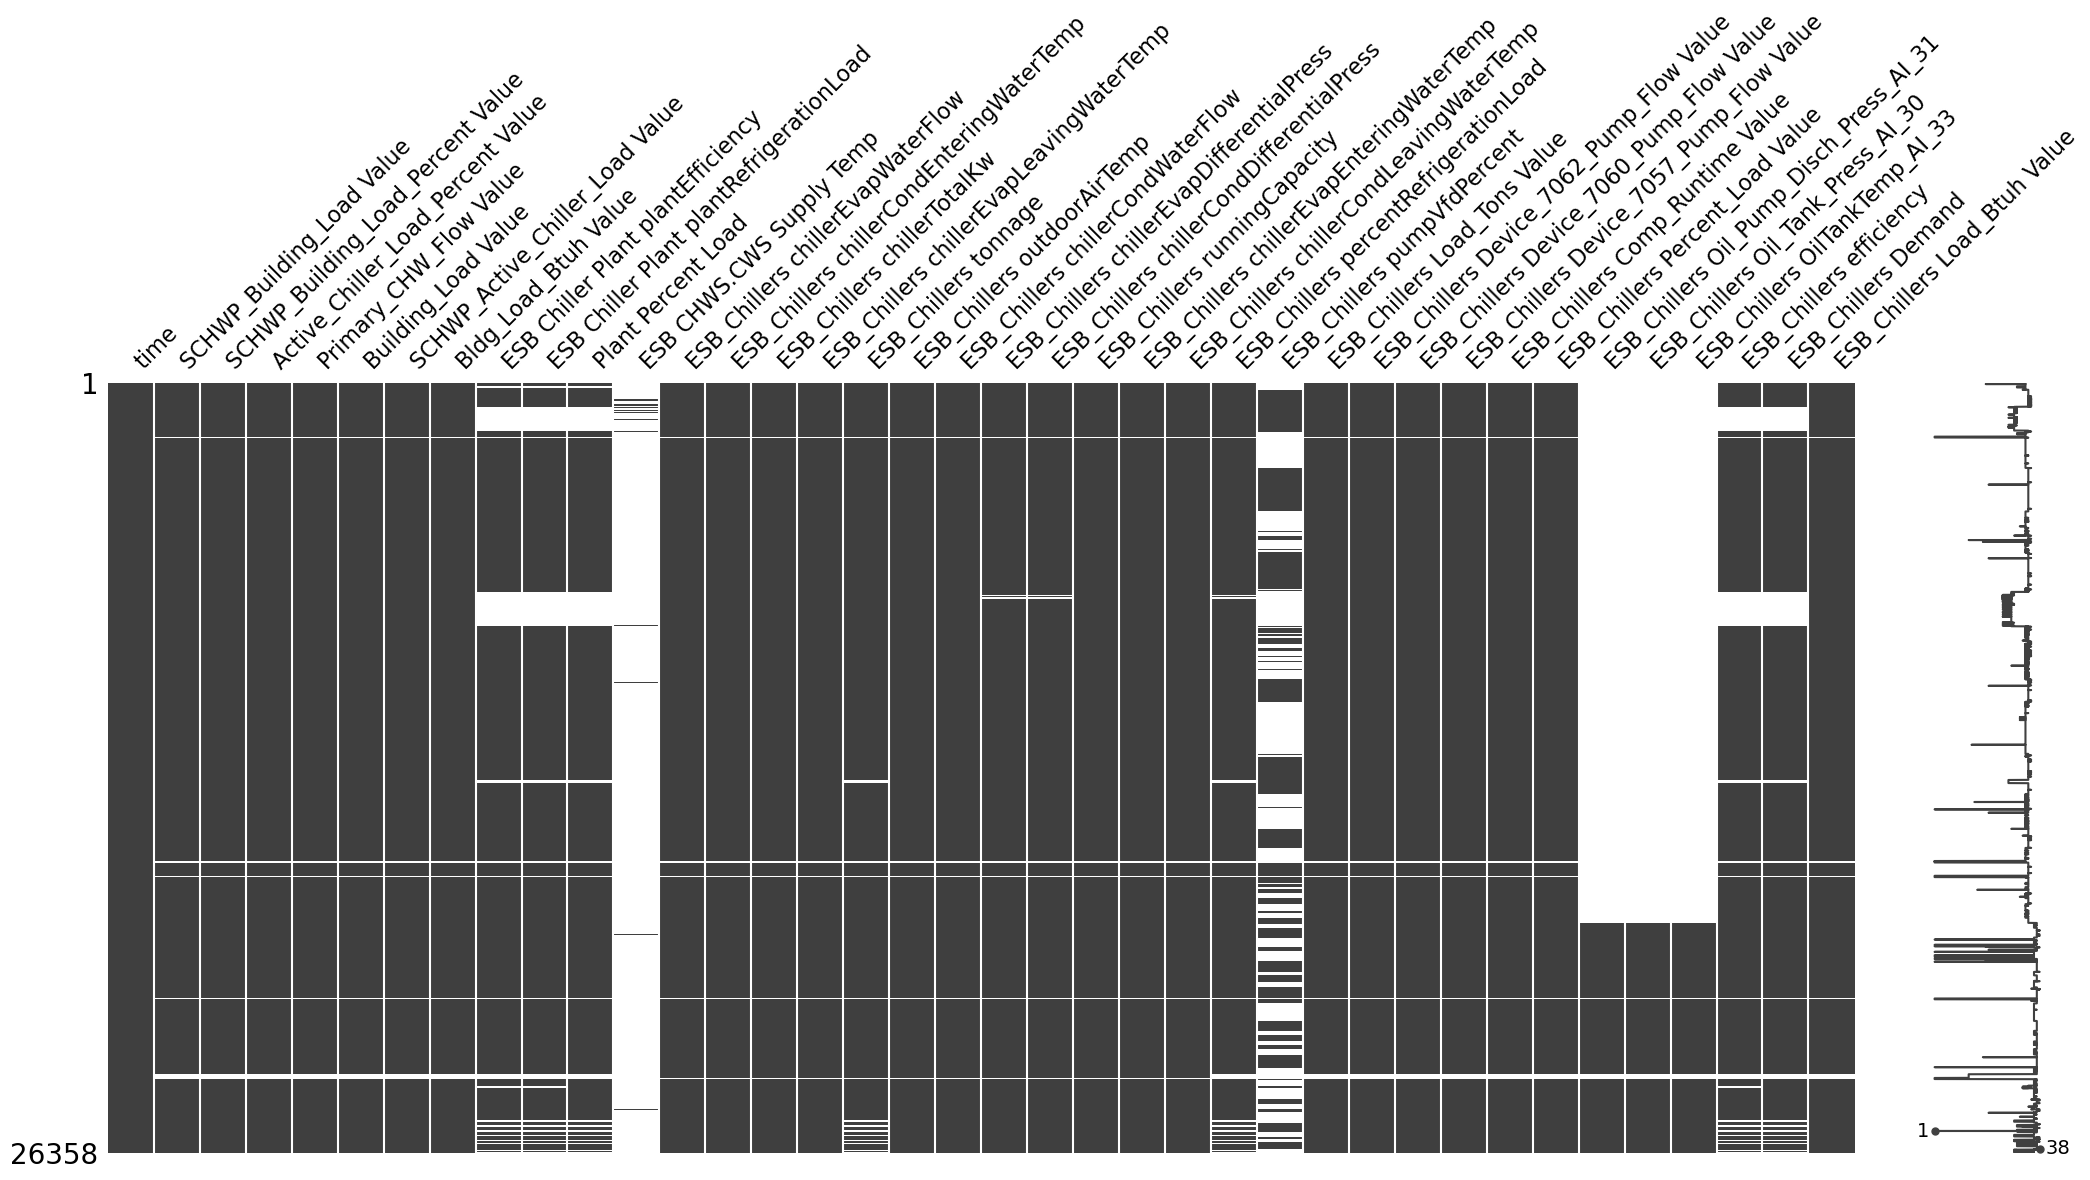

In [91]:
import missingno as msno
msno.matrix(chiller_df)

In [92]:
percentage_null = chiller_df.isnull().mean().sort_values(ascending=False).reset_index()
percentage_null.columns = ['variable', 'null percentage']
display(percentage_null)

,variable,null percentage
0,ESB CHWS.CWS Supply Temp,0.987366
1,ESB_Chillers Oil_Pump_Disch_Press_AI_31,0.710297
2,ESB_Chillers Oil_Tank_Press_AI_30,0.710297
3,ESB_Chillers OilTankTemp_AI_33,0.710297
4,ESB_Chillers pumpVfdPercent,0.505843
5,ESB Chiller Plant plantEfficiency,0.113476
6,ESB Chiller Plant plantRefrigerationLoad,0.113476
7,ESB_Chillers efficiency,0.113059
8,Plant Percent Load,0.110934
9,ESB_Chillers Demand,0.109606


- we want to keep all the pressure readings. so only remove all the features with more than 50% missing. For the remaining features with a lot of values missing, just use them for the seasons where the are presented. 

In [93]:
filtered_variables = percentage_null[percentage_null['null percentage'] < 0.5]['variable']
chiller_df = chiller_df[filtered_variables]
chiller_df

,ESB Chiller Plant plantEfficiency,ESB Chiller Plant plantRefrigerationLoad,ESB_Chillers efficiency,Plant Percent Load,ESB_Chillers Demand,ESB_Chillers percentRefrigerationLoad,ESB_Chillers tonnage,Bldg_Load_Btuh Value,SCHWP_Building_Load Value,ESB_Chillers Device_7062_Pump_Flow Value,...,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers runningCapacity,ESB_Chillers chillerCondWaterFlow,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerEvapWaterFlow,time
7521,0.5767,19.83,0.3851,19.83,122.09,39.65,317.23,0.00,0.00,0.0,...,74.54,46.62,40.33,0.0,68.46,42.29,126.90,67.41,1759.86,2020-03-19 10:00:00
7522,0.5725,20.55,0.3875,20.55,127.27,41.09,328.75,0.00,0.00,0.0,...,75.16,46.79,41.54,0.0,69.64,42.32,134.23,67.98,1762.67,2020-03-19 11:00:00
7523,0.5714,20.90,0.3895,20.90,130.34,41.81,334.46,0.00,0.00,0.0,...,76.01,47.08,42.29,0.0,71.67,42.52,148.26,68.56,1761.29,2020-03-19 12:00:00
7524,0.5818,21.70,0.4067,21.70,141.17,43.40,347.21,0.00,0.00,0.0,...,76.88,47.05,44.34,0.0,74.41,42.32,150.04,69.30,1761.09,2020-03-19 13:00:00
7525,0.5792,21.33,0.4001,21.33,136.66,42.65,341.22,0.00,0.00,0.0,...,76.86,46.97,43.08,0.0,76.22,42.32,156.04,69.41,1761.75,2020-03-19 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,0.4887,12.86,0.3564,12.86,72.67,25.71,205.71,3257569.75,271.69,0.0,...,65.66,44.69,19.07,0.0,52.22,41.98,75.40,62.03,1816.52,2023-03-22 14:00:00
33875,0.5286,10.97,0.3802,10.97,66.13,21.95,175.57,3146824.50,262.83,0.0,...,65.36,44.30,16.05,0.0,53.10,41.98,74.70,61.84,1816.97,2023-03-22 15:00:00
33876,0.5348,10.55,0.3794,10.55,62.81,21.10,168.78,2766067.75,230.31,0.0,...,65.41,44.25,15.56,0.0,54.45,42.02,74.70,62.05,1815.78,2023-03-22 16:00:00
33877,0.5018,11.71,0.3563,11.71,66.74,23.43,187.42,2987228.25,247.90,0.0,...,65.86,44.44,17.07,0.0,55.33,41.96,67.20,62.60,1809.77,2023-03-22 17:00:00


### remove features with little variance

In [94]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.1
selector = VarianceThreshold(threshold=threshold)

df_select = chiller_df.copy()
df_select = df_select.drop('time', axis=1)
selector.fit(df_select)

# Get the boolean mask of selected features
selected_features = selector.get_support()
selected_features

# Get the indices of selected features
selected_indices = np.where(selected_features)[0]

# Subset your feature matrix with the selected features
df_select = df_select.iloc[:, selected_indices]
df_select

,ESB Chiller Plant plantEfficiency,ESB Chiller Plant plantRefrigerationLoad,Plant Percent Load,ESB_Chillers Demand,ESB_Chillers percentRefrigerationLoad,ESB_Chillers tonnage,Bldg_Load_Btuh Value,SCHWP_Building_Load Value,ESB_Chillers Device_7062_Pump_Flow Value,ESB_Chillers Device_7060_Pump_Flow Value,...,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers runningCapacity,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerEvapWaterFlow
7521,0.5767,19.83,19.83,122.09,39.65,317.23,0.00,0.00,0.0,0.0,...,16.4600,11.4800,74.54,46.62,40.33,68.46,42.29,126.90,67.41,1759.86
7522,0.5725,20.55,20.55,127.27,41.09,328.75,0.00,0.00,0.0,0.0,...,16.3800,11.3900,75.16,46.79,41.54,69.64,42.32,134.23,67.98,1762.67
7523,0.5714,20.90,20.90,130.34,41.81,334.46,0.00,0.00,0.0,0.0,...,16.2900,11.3500,76.01,47.08,42.29,71.67,42.52,148.26,68.56,1761.29
7524,0.5818,21.70,21.70,141.17,43.40,347.21,0.00,0.00,0.0,0.0,...,16.4800,11.3300,76.88,47.05,44.34,74.41,42.32,150.04,69.30,1761.09
7525,0.5792,21.33,21.33,136.66,42.65,341.22,0.00,0.00,0.0,0.0,...,16.3800,11.3100,76.86,46.97,43.08,76.22,42.32,156.04,69.41,1761.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,0.4887,12.86,12.86,72.67,25.71,205.71,3257569.75,271.69,0.0,91.0,...,3.6646,2.8147,65.66,44.69,19.07,52.22,41.98,75.40,62.03,1816.52
33875,0.5286,10.97,10.97,66.13,21.95,175.57,3146824.50,262.83,0.0,63.0,...,3.6751,2.3815,65.36,44.30,16.05,53.10,41.98,74.70,61.84,1816.97
33876,0.5348,10.55,10.55,62.81,21.10,168.78,2766067.75,230.31,0.0,76.0,...,3.6673,2.3600,65.41,44.25,15.56,54.45,42.02,74.70,62.05,1815.78
33877,0.5018,11.71,11.71,66.74,23.43,187.42,2987228.25,247.90,0.0,93.0,...,3.6770,2.7988,65.86,44.44,17.07,55.33,41.96,67.20,62.60,1809.77


### remove highly correlated variables

In [95]:
correlation_matrix = df_select.corr()
feature_correlation_threshold = 0.90  # Set correlation threshold

feature_correlations = correlation_matrix.unstack().sort_values(ascending=False)
feature_correlations = feature_correlations[feature_correlations != 1.0]  # Exclude self-correlations

print("All feature correlations:")
for idx, correlation in feature_correlations.items():
    feature1, feature2 = idx
    print(f"({feature1}) - ({feature2}): {correlation}")

print("--------------------------------------------------")

# Filter highly correlated features
highly_correlated_features = feature_correlations[abs(feature_correlations) > feature_correlation_threshold].index.tolist()

print("Highly correlated features to consider removing:")
print(highly_correlated_features)

All feature correlations:
(ESB_Chillers percentRefrigerationLoad) - (ESB_Chillers tonnage): 0.9999866678548888
(ESB_Chillers tonnage) - (ESB_Chillers percentRefrigerationLoad): 0.9999866678548888
(SCHWP_Building_Load_Percent Value) - (SCHWP_Building_Load Value): 0.9998774640401981
(SCHWP_Building_Load Value) - (SCHWP_Building_Load_Percent Value): 0.9998774640401981
(SCHWP_Building_Load Value) - (Building_Load Value): 0.999586737749428
(Building_Load Value) - (SCHWP_Building_Load Value): 0.999586737749428
(SCHWP_Building_Load_Percent Value) - (Building_Load Value): 0.999549714804789
(Building_Load Value) - (SCHWP_Building_Load_Percent Value): 0.999549714804789
(Bldg_Load_Btuh Value) - (Building_Load Value): 0.9994970702063083
(Building_Load Value) - (Bldg_Load_Btuh Value): 0.9994970702063083
(SCHWP_Building_Load Value) - (Bldg_Load_Btuh Value): 0.9994001826678627
(Bldg_Load_Btuh Value) - (SCHWP_Building_Load Value): 0.9994001826678627
(ESB_Chillers Load_Tons Value) - (ESB_Chillers Perce

In [96]:
df_select = df_select.drop([
                      'SCHWP_Building_Load_Percent Value',
                      'ESB_Chillers Load_Tons Value',
                      "SCHWP_Active_Chiller_Load Value", 
                      "Plant Percent Load",
                      "ESB Chiller Plant plantRefrigerationLoad",
                      "ESB_Chillers runningCapacity", ], axis=1)

In [97]:
correlation_matrix = df_select.corr()
feature_correlation_threshold = 0.90  # Set correlation threshold

feature_correlations = correlation_matrix.unstack().sort_values(ascending=False)
feature_correlations = feature_correlations[feature_correlations != 1.0]  # Exclude self-correlations

print("All feature correlations:")
for idx, correlation in feature_correlations.items():
    feature1, feature2 = idx
    print(f"({feature1}) - ({feature2}): {correlation}")

print("--------------------------------------------------")

# Filter highly correlated features
highly_correlated_features = feature_correlations[abs(feature_correlations) > feature_correlation_threshold].index.tolist()

print("Highly correlated features to consider removing:")
print(highly_correlated_features)

All feature correlations:
(ESB_Chillers percentRefrigerationLoad) - (ESB_Chillers tonnage): 0.9999866678548888
(ESB_Chillers tonnage) - (ESB_Chillers percentRefrigerationLoad): 0.9999866678548888
(Building_Load Value) - (SCHWP_Building_Load Value): 0.999586737749428
(SCHWP_Building_Load Value) - (Building_Load Value): 0.999586737749428
(Building_Load Value) - (Bldg_Load_Btuh Value): 0.9994970702063083
(Bldg_Load_Btuh Value) - (Building_Load Value): 0.9994970702063083
(Bldg_Load_Btuh Value) - (SCHWP_Building_Load Value): 0.9994001826678627
(SCHWP_Building_Load Value) - (Bldg_Load_Btuh Value): 0.9994001826678627
(Active_Chiller_Load_Percent Value) - (ESB_Chillers Load_Btuh Value): 0.998770640186384
(ESB_Chillers Load_Btuh Value) - (Active_Chiller_Load_Percent Value): 0.998770640186384
(ESB_Chillers tonnage) - (ESB_Chillers Percent_Load Value): 0.9722229163795095
(ESB_Chillers Percent_Load Value) - (ESB_Chillers tonnage): 0.9722229163795095
(ESB_Chillers Percent_Load Value) - (ESB_Chiller

In [75]:
df_select.columns

Index(['ESB Chiller Plant plantEfficiency', 'ESB_Chillers Demand',
       'ESB_Chillers percentRefrigerationLoad', 'ESB_Chillers tonnage',
       'Bldg_Load_Btuh Value', 'SCHWP_Building_Load Value',
       'ESB_Chillers Device_7062_Pump_Flow Value',
       'ESB_Chillers Device_7060_Pump_Flow Value',
       'ESB_Chillers Comp_Runtime Value', 'ESB_Chillers Percent_Load Value',
       'Active_Chiller_Load_Percent Value', 'Primary_CHW_Flow Value',
       'Building_Load Value', 'ESB_Chillers Load_Btuh Value',
       'ESB_Chillers chillerEvapDifferentialPress',
       'ESB_Chillers chillerCondDifferentialPress',
       'ESB_Chillers chillerCondLeavingWaterTemp',
       'ESB_Chillers chillerEvapEnteringWaterTemp',
       'ESB_Chillers outdoorAirTemp',
       'ESB_Chillers chillerEvapLeavingWaterTemp',
       'ESB_Chillers chillerTotalKw',
       'ESB_Chillers chillerCondEnteringWaterTemp',
       'ESB_Chillers chillerEvapWaterFlow'],
      dtype='object')

In [98]:
df_select = df_select.drop([
                      'ESB_Chillers Device_7060_Pump_Flow Value',
                      'ESB_Chillers Device_7062_Pump_Flow Value',
                      "ESB_Chillers Comp_Runtime Value"], axis=1)

In [99]:
df_select = df_select.drop([
                      'ESB_Chillers Percent_Load Value',
                      'SCHWP_Building_Load Value',
                      'Bldg_Load_Btuh Value',
                      'ESB_Chillers Load_Btuh Value'], axis=1)

In [78]:
df_select.columns

Index(['ESB Chiller Plant plantEfficiency', 'ESB_Chillers Demand',
       'ESB_Chillers percentRefrigerationLoad', 'ESB_Chillers tonnage',
       'Active_Chiller_Load_Percent Value', 'Primary_CHW_Flow Value',
       'Building_Load Value', 'ESB_Chillers chillerEvapDifferentialPress',
       'ESB_Chillers chillerCondDifferentialPress',
       'ESB_Chillers chillerCondLeavingWaterTemp',
       'ESB_Chillers chillerEvapEnteringWaterTemp',
       'ESB_Chillers outdoorAirTemp',
       'ESB_Chillers chillerEvapLeavingWaterTemp',
       'ESB_Chillers chillerTotalKw',
       'ESB_Chillers chillerCondEnteringWaterTemp',
       'ESB_Chillers chillerEvapWaterFlow'],
      dtype='object')

In [79]:
df_select

,ESB Chiller Plant plantEfficiency,ESB_Chillers Demand,ESB_Chillers percentRefrigerationLoad,ESB_Chillers tonnage,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Building_Load Value,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerEvapWaterFlow
7521,0.5767,122.09,39.65,317.23,0.00,0.00,0.00,16.4600,11.4800,74.54,46.62,68.46,42.29,126.90,67.41,1759.86
7522,0.5725,127.27,41.09,328.75,0.00,0.00,0.00,16.3800,11.3900,75.16,46.79,69.64,42.32,134.23,67.98,1762.67
7523,0.5714,130.34,41.81,334.46,0.00,0.00,0.00,16.2900,11.3500,76.01,47.08,71.67,42.52,148.26,68.56,1761.29
7524,0.5818,141.17,43.40,347.21,0.00,0.00,0.00,16.4800,11.3300,76.88,47.05,74.41,42.32,150.04,69.30,1761.09
7525,0.5792,136.66,42.65,341.22,0.00,0.00,0.00,16.3800,11.3100,76.86,46.97,76.22,42.32,156.04,69.41,1761.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,0.4887,72.67,25.71,205.71,21.35,1795.77,272.31,3.6646,2.8147,65.66,44.69,52.22,41.98,75.40,62.03,1816.52
33875,0.5286,66.13,21.95,175.57,18.88,1794.89,262.83,3.6751,2.3815,65.36,44.30,53.10,41.98,74.70,61.84,1816.97
33876,0.5348,62.81,21.10,168.78,15.16,1788.79,230.31,3.6673,2.3600,65.41,44.25,54.45,42.02,74.70,62.05,1815.78
33877,0.5018,66.74,23.43,187.42,17.68,1781.89,248.12,3.6770,2.7988,65.86,44.44,55.33,41.96,67.20,62.60,1809.77


<Axes: >

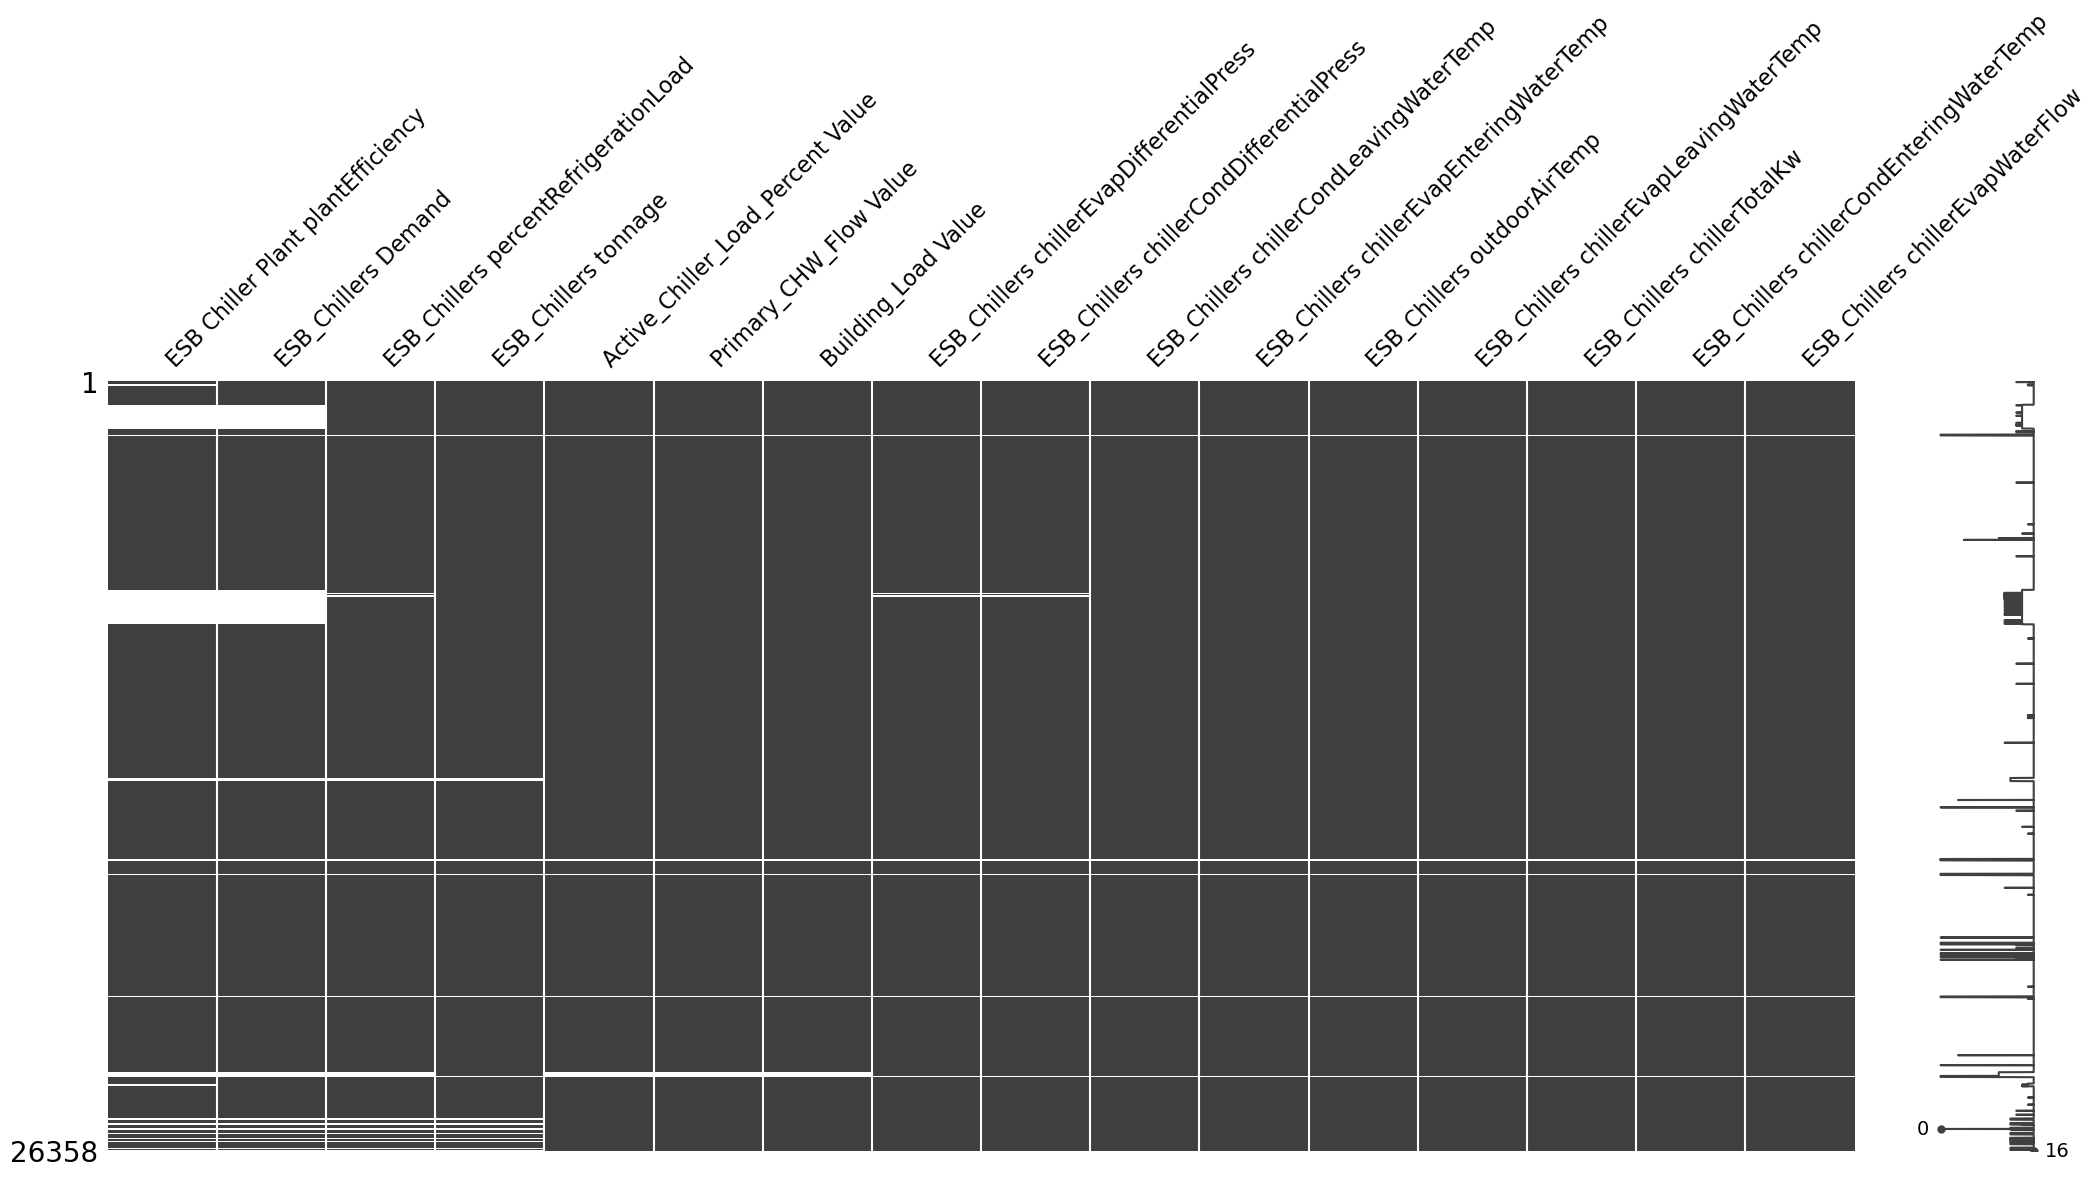

In [100]:
msno.matrix(df_select.iloc[:, ])

### data imputation
First, we'll find a day without any missing values. We'll then apply the Next Observation Carried Backward (NOCB) strategy for dates before this date, and Last Observation Carried Forward (LOCF) for dates after this.

<Axes: >

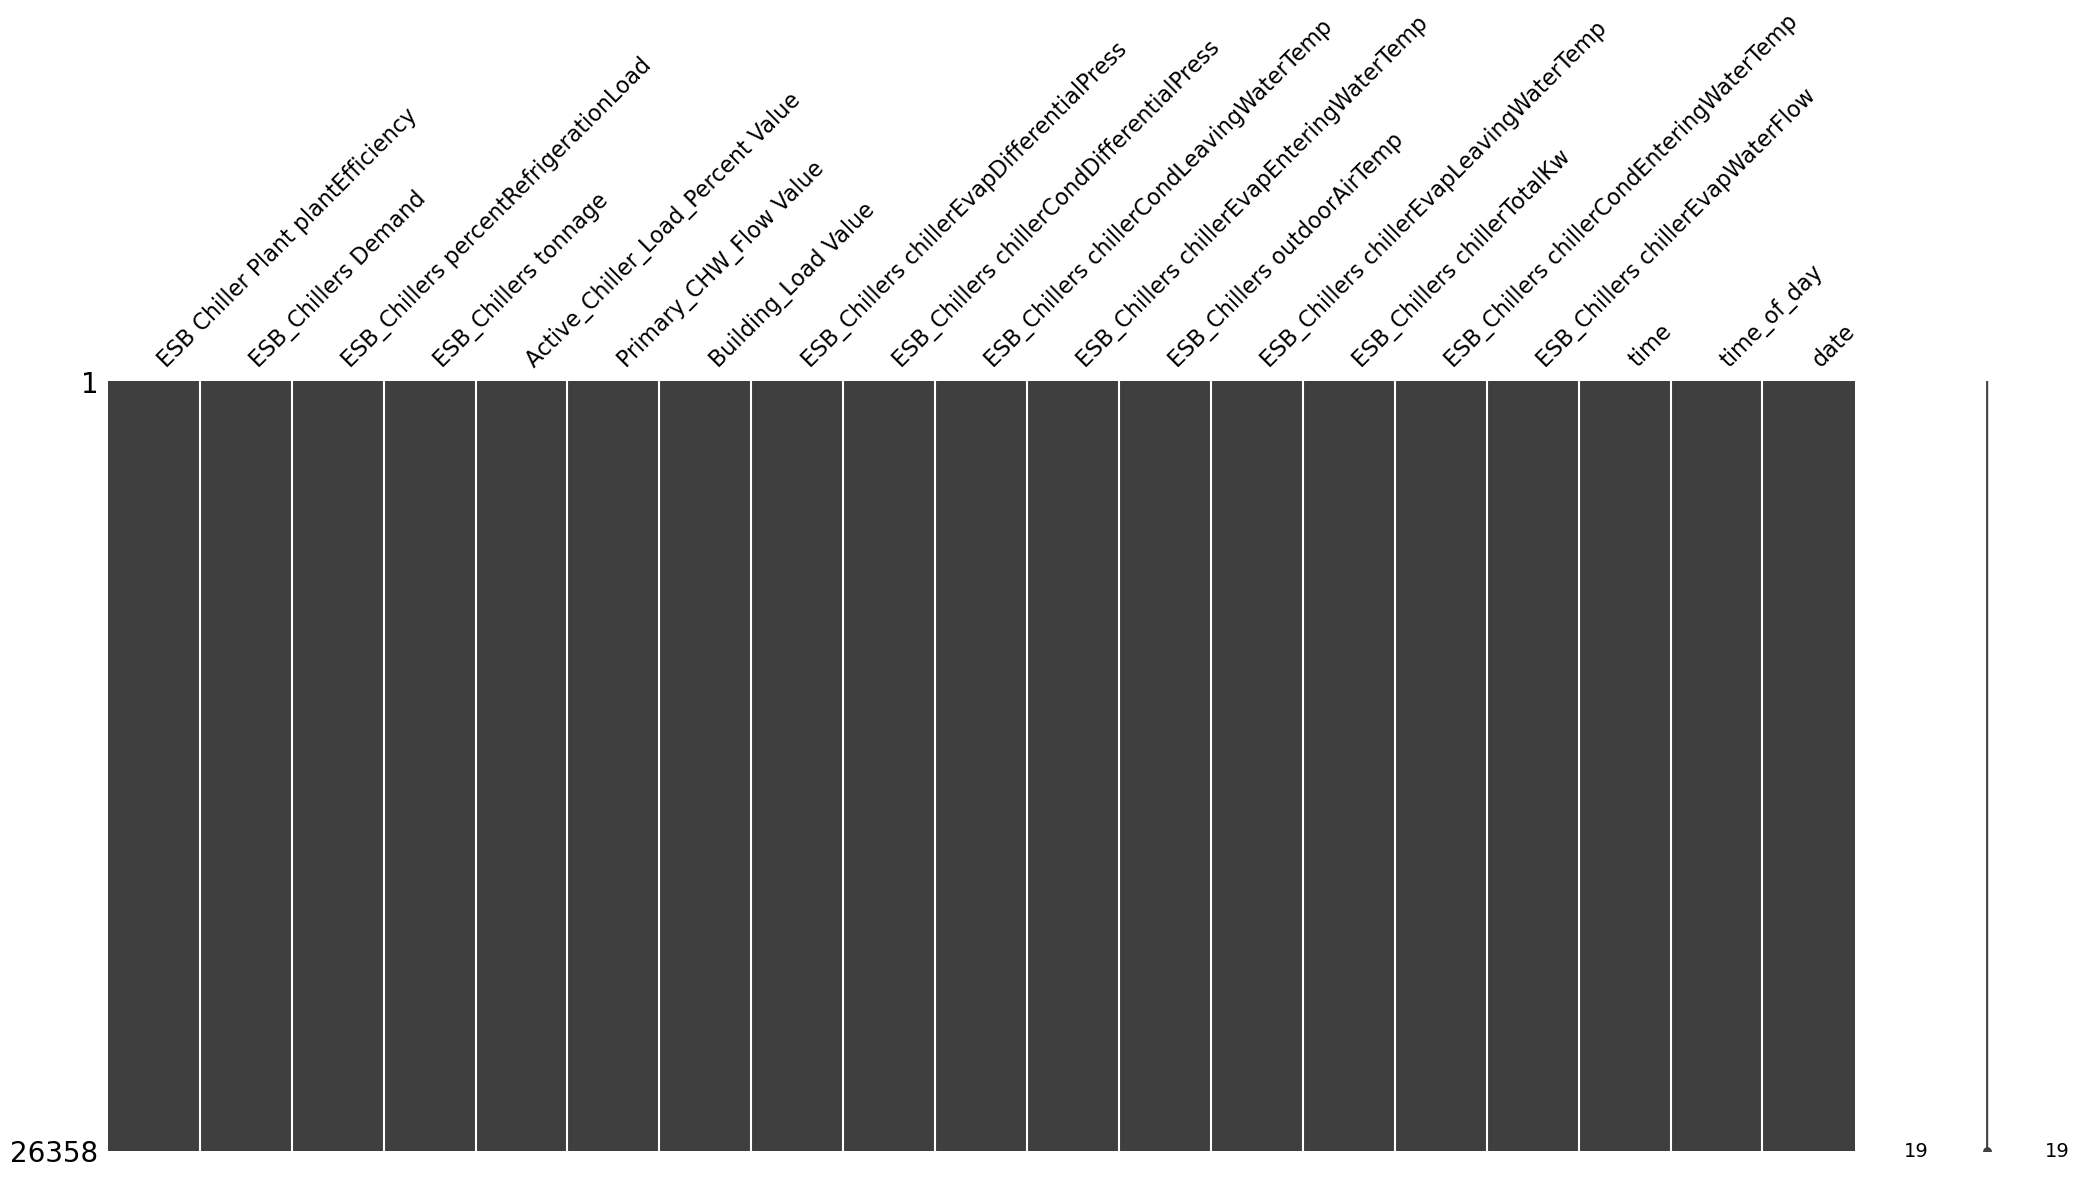

In [82]:
df = df_select.copy()
df['time'] = chiller_df['time']
# Extract the 'time of day' from the 'time' column
df['time_of_day'] = df['time'].dt.time

# Extract the date from the 'time' column
df['date'] = df['time'].dt.date

# Sort by 'time_of_day' and 'date'
df.sort_values(by=['time_of_day', 'date'], inplace=True)

# Group by the 'time of day' and fill missing values forward and backward
df_grouped = df.groupby('time_of_day')

df_filled = df_grouped.apply(lambda group: group.ffill().bfill())

msno.matrix(df_filled)

In [83]:
null_counts = df_filled.isnull().sum()
print(null_counts)

df_filled.sort_values(by='time', inplace=True)
df_filled.reset_index(drop=True, inplace=True)
df_filled = df_filled.drop(["time_of_day", "date"], axis=1)

ESB Chiller Plant plantEfficiency            0
ESB_Chillers Demand                          0
ESB_Chillers percentRefrigerationLoad        0
ESB_Chillers tonnage                         0
Active_Chiller_Load_Percent Value            0
Primary_CHW_Flow Value                       0
Building_Load Value                          0
ESB_Chillers chillerEvapDifferentialPress    0
ESB_Chillers chillerCondDifferentialPress    0
ESB_Chillers chillerCondLeavingWaterTemp     0
ESB_Chillers chillerEvapEnteringWaterTemp    0
ESB_Chillers outdoorAirTemp                  0
ESB_Chillers chillerEvapLeavingWaterTemp     0
ESB_Chillers chillerTotalKw                  0
ESB_Chillers chillerCondEnteringWaterTemp    0
ESB_Chillers chillerEvapWaterFlow            0
time                                         0
time_of_day                                  0
date                                         0
dtype: int64


In [102]:
df_select['time'] = chiller_df['time']

In [103]:
import pickle

file_path = './data/chiller_hourly_processed.pkl'

# export dataframes
with open(file_path, 'wb') as f:
    pickle.dump(df_select, f)

### calculate difference

<Axes: >

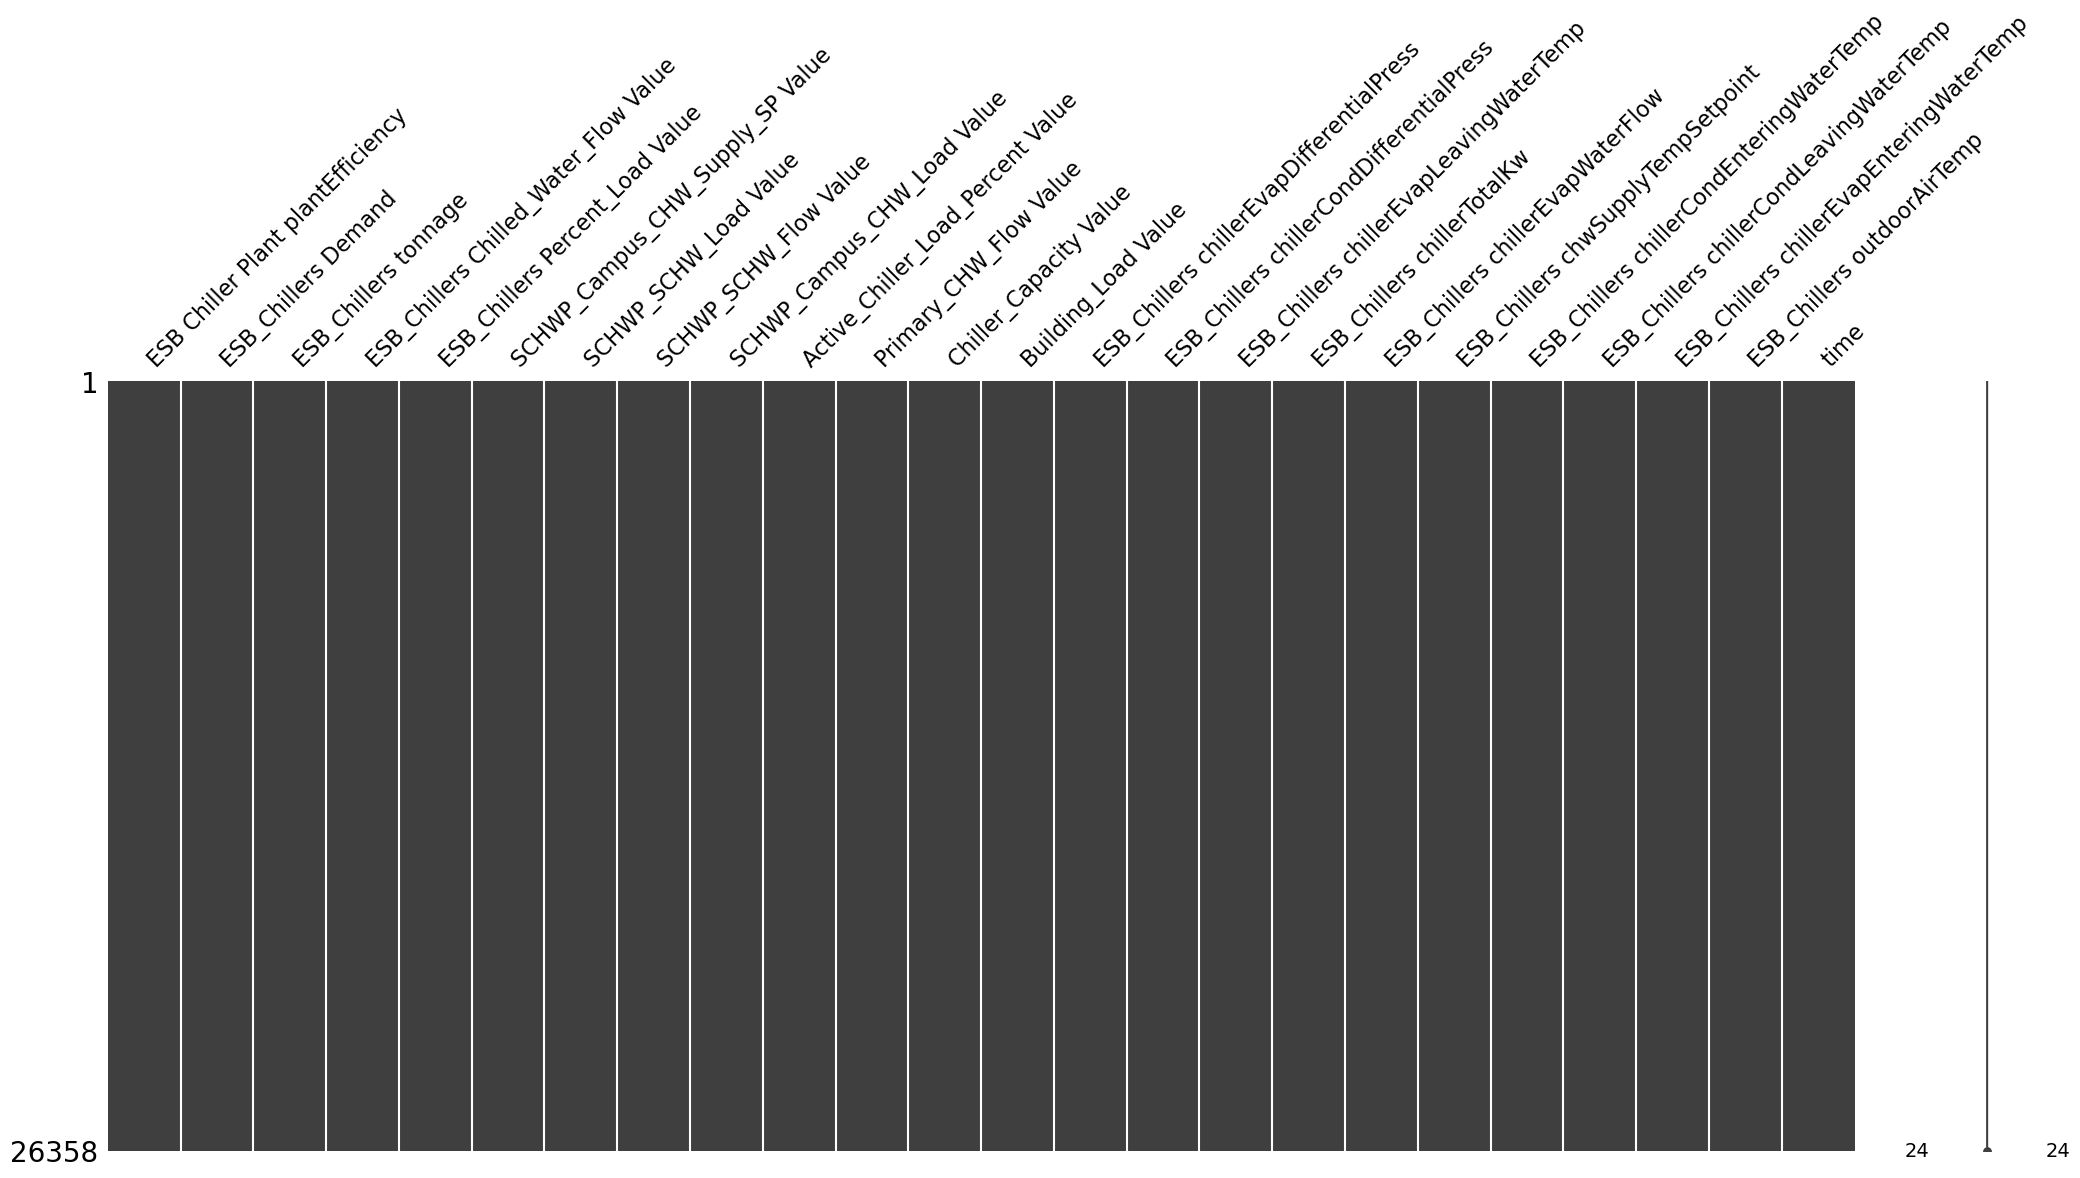

In [136]:
msno.matrix(df_filled)

In [93]:
# df_filled['ESB_Chillers Evaporator_Difference_Temp'] = df_filled['ESB_Chillers chillerEvapLeavingWaterTemp'] - df_filled['ESB_Chillers chillerEvapEnteringWaterTemp']
# df_filled['ESB_Chillers Condenser_Difference_Temp'] = df_filled['ESB_Chillers chillerCondLeavingWaterTemp'] - df_filled['ESB_Chillers chillerCondEnteringWaterTemp']
# df_filled['ESB_Chillers Chilled_Water_Supply_Difference_Temp'] = df_filled['ESB_Chillers chwSupplyTempSetpoint'] - df_filled['ESB CHWS.CWS Supply Temp']

# columns_to_drop = ['ESB_Chillers chillerEvapLeavingWaterTemp', 'ESB_Chillers chillerEvapEnteringWaterTemp',
#                    'ESB_Chillers chillerCondLeavingWaterTemp', 'ESB_Chillers chillerCondEnteringWaterTemp',
#                    'ESB_Chillers chwSupplyTempSetpoint', 'ESB CHWS.CWS Supply Temp']
# df_filled.drop(columns=columns_to_drop, inplace=True)
# df_filled

,ESB_Chillers efficiency,ESB_Chillers tonnage,ESB_Chillers Chilled_Water_Flow Value,ESB_Chillers Comp_Runtime Value,SCHWP_SCHW_Load Value,Building_Load Value,Primary_CHW_Flow Value,Active_Chiller_Load_Percent Value,SCHWP_Campus_CHW_Load Value,SCHWP_SCHW_Flow Value,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerEvapWaterFlow,time,ESB_Chillers Evaporator_Difference_Temp,ESB_Chillers Condenser_Difference_Temp,ESB_Chillers Chilled_Water_Supply_Difference_Temp
0,0.292978,194.212809,1718.975220,20788.064453,76174.117188,265.069885,1764.691406,22.921356,0.0,18.698492,5.207952,1.721777,60.003231,56.900002,1726.089233,2021-03-24 05:55:00+00:00,-2.700386,1.983257,-0.223423
1,0.404302,150.135152,1719.986206,20788.064453,75481.289062,282.922363,1777.609375,22.203333,0.0,18.698492,5.179606,1.721777,60.003231,60.700001,1722.628174,2021-03-24 06:00:00+00:00,-2.091713,1.983257,-0.189453
2,0.329606,171.720378,1727.348145,20788.193359,72806.437500,299.032593,1774.373657,23.996885,0.0,17.695997,5.175507,1.759047,60.003231,56.599998,1716.179810,2021-03-24 06:05:00+00:00,-2.401432,1.675808,-0.231789
3,0.298308,169.623342,1717.828491,20788.324219,69029.257812,233.627380,1764.616577,19.084475,0.0,16.694218,5.197519,1.759047,60.003231,50.599998,1719.332764,2021-03-24 06:10:00+00:00,-2.367756,1.675808,0.000202
4,0.332092,170.133555,1720.138672,20788.453125,72123.984375,257.068176,1747.785278,20.118532,0.0,16.694218,5.214506,1.759047,59.703251,56.500000,1720.841919,2021-03-24 06:15:00+00:00,-2.372795,1.972649,0.010563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203924,0.353108,0.000000,1798.387573,0.000000,0.000000,380.085052,1766.530273,45.475380,0.0,0.000000,4.064539,-0.199718,68.094368,0.000000,0.000000,2023-03-27 18:10:00+00:00,0.000000,0.000000,0.146591
203925,0.335515,0.000000,1798.387573,0.000000,0.000000,366.401703,1766.530273,41.428307,0.0,0.000000,4.063708,-0.199718,68.411301,0.000000,0.000000,2023-03-27 18:15:00+00:00,0.000000,0.000000,-0.391323
203926,0.292590,0.000000,1798.387573,0.000000,0.000000,342.724731,1766.530273,41.419086,0.0,0.000000,4.066688,-0.199718,69.349915,0.000000,0.000000,2023-03-27 18:20:00+00:00,0.000000,0.000000,-0.458874
203927,0.429638,0.000000,1798.387573,0.000000,0.000000,346.220764,1766.530273,42.421333,0.0,0.000000,4.033950,-0.199718,70.003754,0.000000,0.000000,2023-03-27 18:25:00+00:00,0.000000,0.000000,-0.469654


<Axes: >

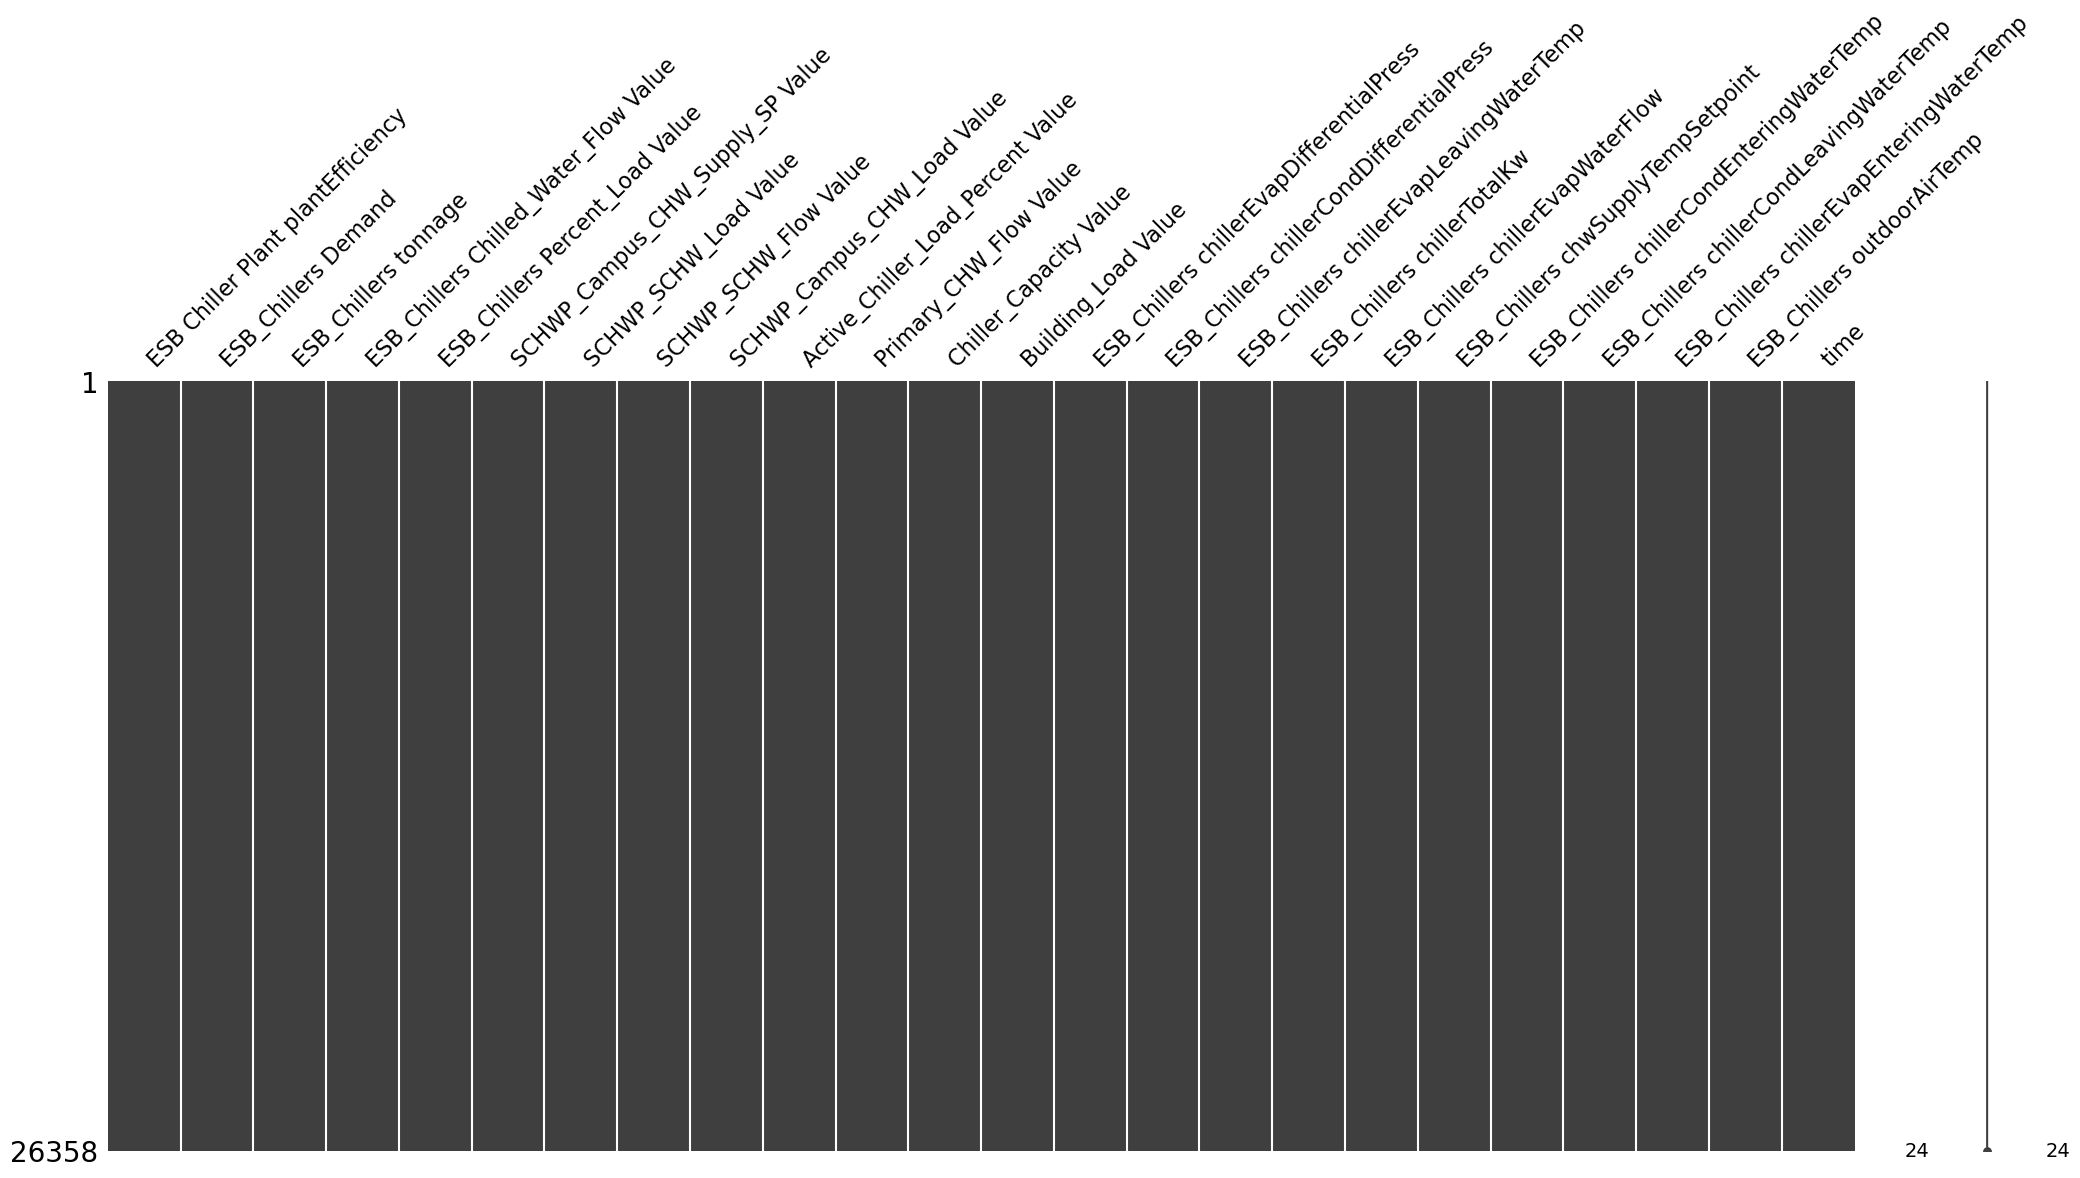

In [137]:
msno.matrix(df_filled)

In [138]:
chiller_df = df_filled.copy()

In [139]:
chiller_df

,ESB Chiller Plant plantEfficiency,ESB_Chillers Demand,ESB_Chillers tonnage,ESB_Chillers Chilled_Water_Flow Value,ESB_Chillers Percent_Load Value,SCHWP_Campus_CHW_Supply_SP Value,SCHWP_SCHW_Load Value,SCHWP_SCHW_Flow Value,SCHWP_Campus_CHW_Load Value,Active_Chiller_Load_Percent Value,...,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerEvapWaterFlow,ESB_Chillers chwSupplyTempSetpoint,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers outdoorAirTemp,time
0,0.5767,122.09,317.23,0.00,41.44,0.0,0.00,0.00,0.0,0.00,...,11.4800,42.29,126.90,1759.86,42.0,67.41,74.54,46.62,68.46,2020-03-19 10:00:00
1,0.5725,127.27,328.75,0.00,41.30,0.0,0.00,0.00,0.0,0.00,...,11.3900,42.32,134.23,1762.67,42.0,67.98,75.16,46.79,69.64,2020-03-19 11:00:00
2,0.5714,130.34,334.46,0.00,42.85,0.0,0.00,0.00,0.0,0.00,...,11.3500,42.52,148.26,1761.29,42.0,68.56,76.01,47.08,71.67,2020-03-19 12:00:00
3,0.5818,141.17,347.21,0.00,41.48,0.0,0.00,0.00,0.0,0.00,...,11.3300,42.32,150.04,1761.09,42.0,69.30,76.88,47.05,74.41,2020-03-19 13:00:00
4,0.5792,136.66,341.22,0.00,39.27,0.0,0.00,0.00,0.0,0.00,...,11.3100,42.32,156.04,1761.75,42.0,69.41,76.86,46.97,76.22,2020-03-19 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26353,0.4887,72.67,205.71,1811.56,21.35,0.0,69949.73,13.94,0.0,21.35,...,2.8147,41.98,75.40,1816.52,42.0,62.03,65.66,44.69,52.22,2023-03-22 14:00:00
26354,0.5286,66.13,175.57,1819.25,18.88,0.0,28067.86,12.73,0.0,18.88,...,2.3815,41.98,74.70,1816.97,42.0,61.84,65.36,44.30,53.10,2023-03-22 15:00:00
26355,0.5348,62.81,168.78,1812.16,15.16,0.0,36843.98,14.36,0.0,15.16,...,2.3600,42.02,74.70,1815.78,42.0,62.05,65.41,44.25,54.45,2023-03-22 16:00:00
26356,0.5018,66.74,187.42,1801.99,17.68,0.0,38814.07,14.36,0.0,17.68,...,2.7988,41.96,67.20,1809.77,42.0,62.60,65.86,44.44,55.33,2023-03-22 17:00:00


### divide by season

In [141]:
from datetime import datetime, timezone, timedelta
import pytz


seasons = {
    'Spring 2020': (pd.to_datetime('2020-01-3'), pd.to_datetime('2020-05-09')),
    'Summer 2020': (pd.to_datetime('2020-05-10'), pd.to_datetime('2020-08-16')),
    'Fall 2020': (pd.to_datetime('2020-08-17'), pd.to_datetime('2020-12-12')),
    'Winter 2020': (pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-24')),
    'Spring 2021': (pd.to_datetime('2021-01-25'), pd.to_datetime('2021-05-10')),
    'Summer 2021': (pd.to_datetime('2021-05-11'), pd.to_datetime('2021-08-19')),
    'Fall 2021': (pd.to_datetime('2021-08-20'), pd.to_datetime('2021-12-18')),
    'Winter 2021': (pd.to_datetime('2021-12-19'), pd.to_datetime('2022-01-14')),
    'Spring 2022': (pd.to_datetime('2022-01-15'), pd.to_datetime('2022-05-09')),
    'Summer 2022': (pd.to_datetime('2022-05-10'), pd.to_datetime('2022-08-18')),
    'Fall 2022': (pd.to_datetime('2022-08-19'), pd.to_datetime('2022-12-17')),
    'Winter 2022': (pd.to_datetime('2022-12-18'), pd.to_datetime('2023-01-05')),
    'Spring 2023': (pd.to_datetime('2023-01-06'), pd.to_datetime('2023-05-04')),
    'Summer 2023': (pd.to_datetime('2023-05-05'), pd.to_datetime('2023-06-06'))
}

chiller_df['Season'] = pd.NA

# Assign the season value based on the date ranges
for season, (start_date, end_date) in seasons.items():
    mask = (chiller_df['time'].dt.date >= start_date.date()) & (chiller_df['time'].dt.date <= end_date.date())
    chiller_df.loc[mask, 'Season'] = season

chiller_df['Season'] = chiller_df['Season'].str.split().str[0]
print(chiller_df[['time', 'Season']])

                     time  Season
0     2020-03-19 10:00:00  Spring
1     2020-03-19 11:00:00  Spring
2     2020-03-19 12:00:00  Spring
3     2020-03-19 13:00:00  Spring
4     2020-03-19 14:00:00  Spring
...                   ...     ...
26353 2023-03-22 14:00:00  Spring
26354 2023-03-22 15:00:00  Spring
26355 2023-03-22 16:00:00  Spring
26356 2023-03-22 17:00:00  Spring
26357 2023-03-22 18:00:00  Spring

[26358 rows x 2 columns]


### remove outliers
for each season and for each feature, identify points where the absolute Z-score is greater than a certain threshold (e.g., 3) as outliers.

In [45]:
import pandas as pd

chiller_df.sort_values(by='time', inplace=True)

# Convert the 'time' column to a datetime object if it's not already
chiller_df['time'] = pd.to_datetime(chiller_df['time'])

# Group the DataFrame by date and check the number of entries for each day
counts_by_day = chiller_df.groupby(chiller_df['time'].dt.date).size()

# Get the dates with incomplete data (less than 24 entries)
incomplete_days = counts_by_day[counts_by_day < 24].index

# Filter the DataFrame to keep only the rows that belong to complete days
# chiller_df = chiller_df[~chiller_df['time'].dt.date.isin(incomplete_days)]


In [46]:
incomplete_days

Index([2020-03-19, 2021-03-14, 2022-03-13, 2023-03-12, 2023-03-22], dtype='object', name='time')

<Axes: >

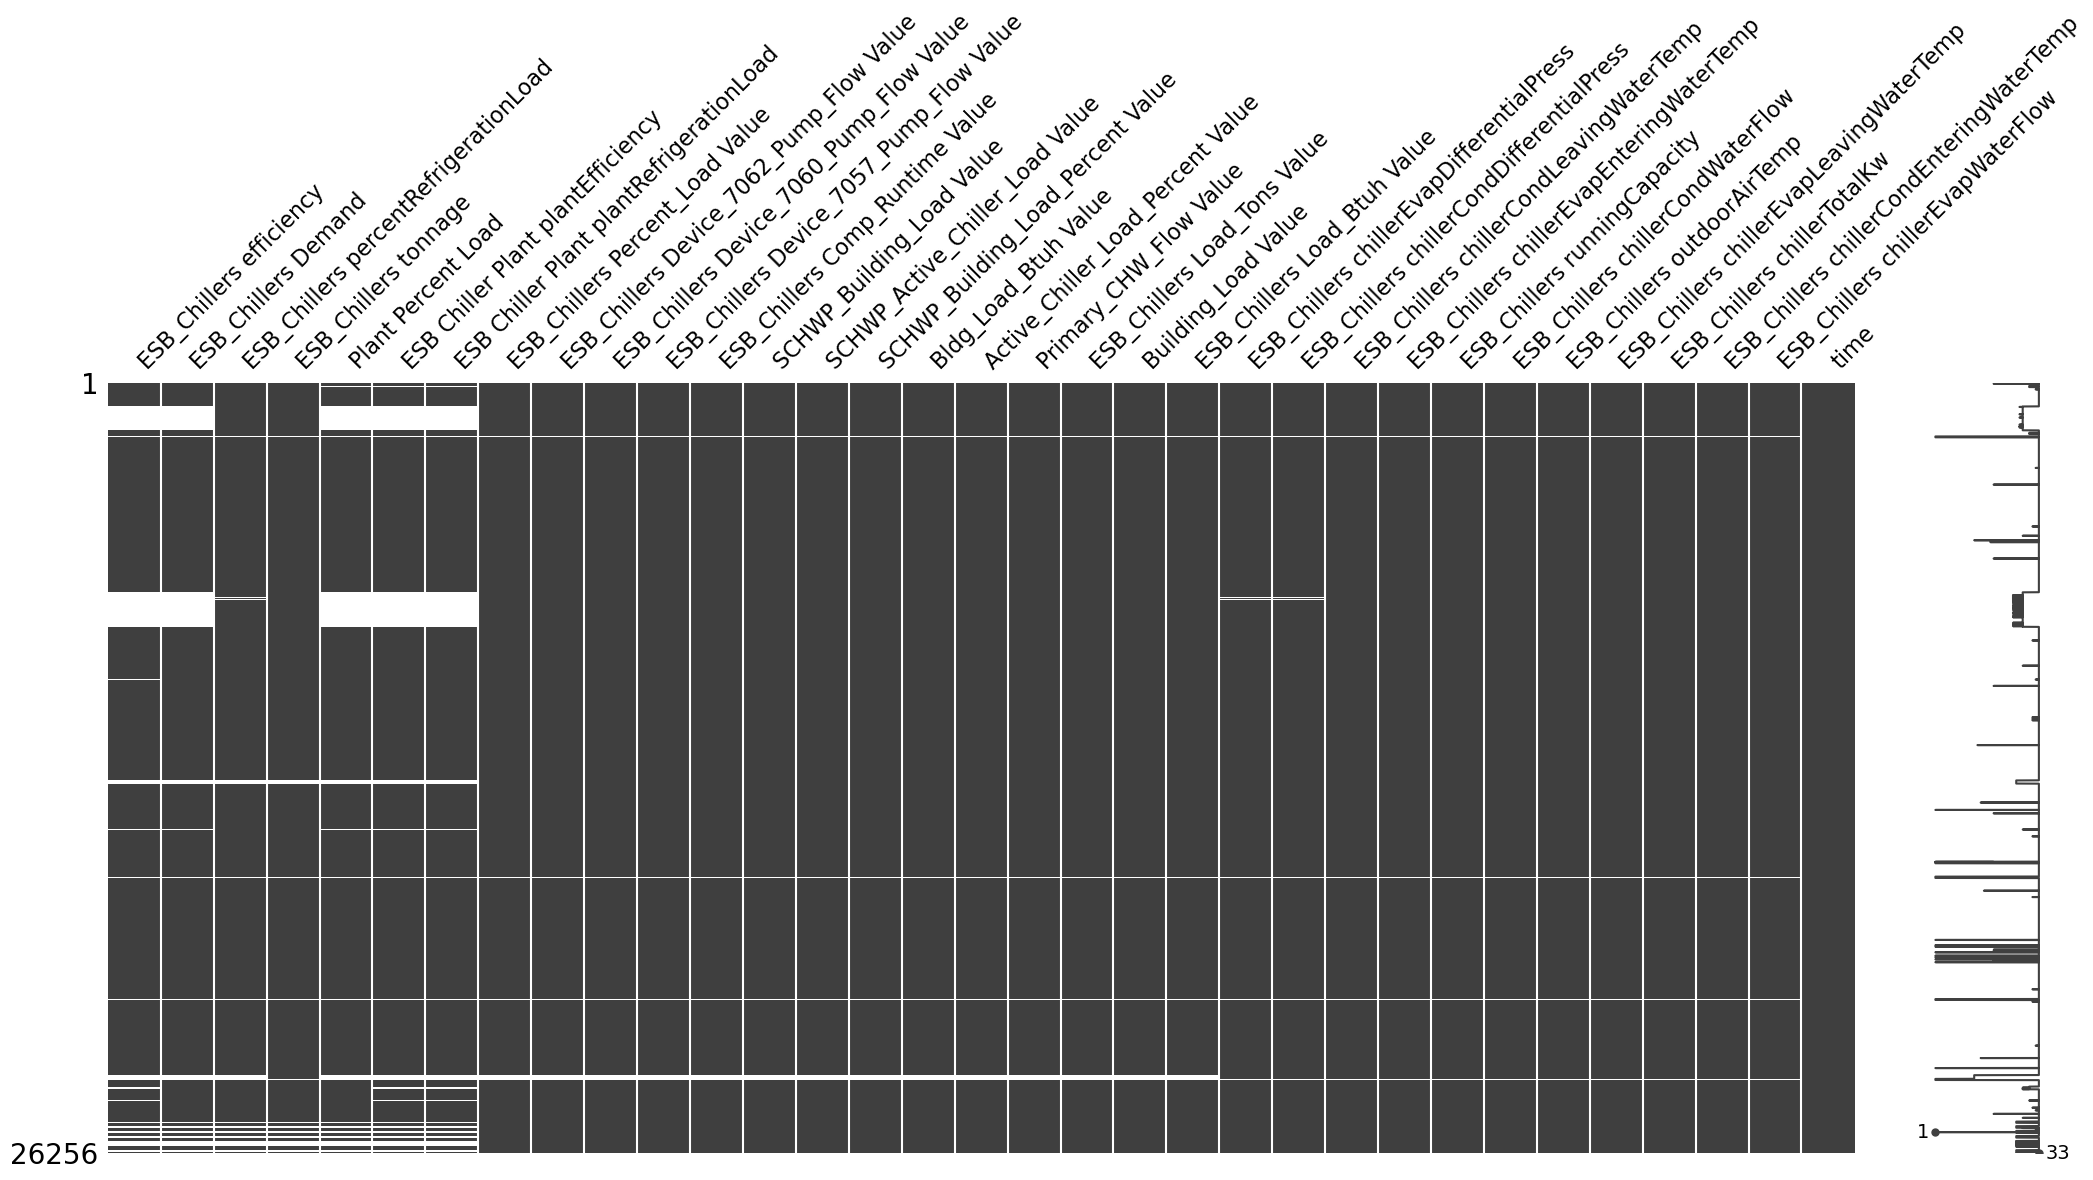

In [47]:
chiller_df = chiller_df[~chiller_df['time'].dt.date.isin(incomplete_days)]
msno.matrix(chiller_df)

In [142]:
from scipy import stats
df_clean = chiller_df.drop('time', axis=1).copy()
numeric_columns = df_clean.select_dtypes(include=np.number).columns

# Remove outliers from non-zero values in numeric columns, grouped by season
for column in numeric_columns:
    for season in df_clean['Season'].unique():
        non_zero_values = df_clean[column][(df_clean[column] != 0) & (df_clean['Season'] == season)]
        z_scores = np.abs(stats.zscore(non_zero_values))
        outliers = non_zero_values[(z_scores > 3)]
        df_clean[column] = np.where((df_clean[column] != 0) & (df_clean['Season'] == season) & df_clean[column].isin(outliers), np.nan, df_clean[column])

# Remove rows with np.nan values
df_clean = df_clean.dropna()
df_clean.shape

(23934, 24)

In [144]:
df_clean['time'] = chiller_df['time']

In [145]:
import pickle

file_path = ter

# export dataframes
with open(file_path, 'wb') as f:
    pickle.dump(df_clean, f)

### convert to daily mean and variance for each feature

In [106]:
import pickle
df_clean = pd.read_pickle('chiller1_pointly_processed.pkl')
df_clean

,ESB_Chillers efficiency,ESB_Chillers tonnage,ESB_Chillers Chilled_Water_Flow Value,ESB_Chillers Comp_Runtime Value,SCHWP_SCHW_Load Value,Building_Load Value,Primary_CHW_Flow Value,Active_Chiller_Load_Percent Value,SCHWP_Campus_CHW_Load Value,SCHWP_SCHW_Flow Value,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerEvapWaterFlow,ESB_Chillers Evaporator_Difference_Temp,ESB_Chillers Condenser_Difference_Temp,ESB_Chillers Chilled_Water_Supply_Difference_Temp,Season,time
0,0.292978,194.212809,1718.975220,20788.064453,76174.117188,265.069885,1764.691406,22.921356,0.0,18.698492,5.207952,1.721777,60.003231,56.900002,1726.089233,-2.700386,1.983257,-0.223423,Spring,2021-03-24 05:55:00+00:00
1,0.404302,150.135152,1719.986206,20788.064453,75481.289062,282.922363,1777.609375,22.203333,0.0,18.698492,5.179606,1.721777,60.003231,60.700001,1722.628174,-2.091713,1.983257,-0.189453,Spring,2021-03-24 06:00:00+00:00
2,0.329606,171.720378,1727.348145,20788.193359,72806.437500,299.032593,1774.373657,23.996885,0.0,17.695997,5.175507,1.759047,60.003231,56.599998,1716.179810,-2.401432,1.675808,-0.231789,Spring,2021-03-24 06:05:00+00:00
3,0.298308,169.623342,1717.828491,20788.324219,69029.257812,233.627380,1764.616577,19.084475,0.0,16.694218,5.197519,1.759047,60.003231,50.599998,1719.332764,-2.367756,1.675808,0.000202,Spring,2021-03-24 06:10:00+00:00
4,0.332092,170.133555,1720.138672,20788.453125,72123.984375,257.068176,1747.785278,20.118532,0.0,16.694218,5.214506,1.759047,59.703251,56.500000,1720.841919,-2.372795,1.972649,0.010563,Spring,2021-03-24 06:15:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203924,0.353108,0.000000,1798.387573,0.000000,0.000000,380.085052,1766.530273,45.475380,0.0,0.000000,4.064539,-0.199718,68.094368,0.000000,0.000000,0.000000,0.000000,0.146591,Spring,2023-03-27 18:10:00+00:00
203925,0.335515,0.000000,1798.387573,0.000000,0.000000,366.401703,1766.530273,41.428307,0.0,0.000000,4.063708,-0.199718,68.411301,0.000000,0.000000,0.000000,0.000000,-0.391323,Spring,2023-03-27 18:15:00+00:00
203926,0.292590,0.000000,1798.387573,0.000000,0.000000,342.724731,1766.530273,41.419086,0.0,0.000000,4.066688,-0.199718,69.349915,0.000000,0.000000,0.000000,0.000000,-0.458874,Spring,2023-03-27 18:20:00+00:00
203927,0.429638,0.000000,1798.387573,0.000000,0.000000,346.220764,1766.530273,42.421333,0.0,0.000000,4.033950,-0.199718,70.003754,0.000000,0.000000,0.000000,0.000000,-0.469654,Spring,2023-03-27 18:25:00+00:00


In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189257 entries, 0 to 203928
Data columns (total 20 columns):
 #   Column                                             Non-Null Count   Dtype              
---  ------                                             --------------   -----              
 0   ESB_Chillers efficiency                            189257 non-null  float64            
 1   ESB_Chillers tonnage                               189257 non-null  float64            
 2   ESB_Chillers Chilled_Water_Flow Value              189257 non-null  float64            
 3   ESB_Chillers Comp_Runtime Value                    189257 non-null  float64            
 4   SCHWP_SCHW_Load Value                              189257 non-null  float64            
 5   Building_Load Value                                189257 non-null  float64            
 6   Primary_CHW_Flow Value                             189257 non-null  float64            
 7   Active_Chiller_Load_Percent Value                  1

In [108]:
df_daily = df_clean.drop(['Season'], axis=1)

df_daily.set_index('time', inplace=True)
# Calculate daily mean and fill NaN values with 0
df_daily_mean = df_daily.resample('D').mean().fillna(0)

# Calculate daily variance and fill NaN values with 0
df_daily_variance = df_daily.resample('D').var().fillna(0)

# Concatenate the mean and variance dataframes along the column axis
df_daily_stats = pd.concat([df_daily_mean, df_daily_variance], axis=1)

# Create new column names
mean_cols = [f'{col}_mean' for col in df_daily_mean.columns]
variance_cols = [f'{col}_variance' for col in df_daily_variance.columns]

# Assign new column names to the dataframe
df_daily_stats.columns = mean_cols + variance_cols

df_daily_stats

,ESB_Chillers efficiency_mean,ESB_Chillers tonnage_mean,ESB_Chillers Chilled_Water_Flow Value_mean,ESB_Chillers Comp_Runtime Value_mean,SCHWP_SCHW_Load Value_mean,Building_Load Value_mean,Primary_CHW_Flow Value_mean,Active_Chiller_Load_Percent Value_mean,SCHWP_Campus_CHW_Load Value_mean,SCHWP_SCHW_Flow Value_mean,...,SCHWP_Campus_CHW_Load Value_variance,SCHWP_SCHW_Flow Value_variance,ESB_Chillers chillerEvapDifferentialPress_variance,ESB_Chillers chillerCondDifferentialPress_variance,ESB_Chillers outdoorAirTemp_variance,ESB_Chillers chillerTotalKw_variance,ESB_Chillers chillerEvapWaterFlow_variance,ESB_Chillers Evaporator_Difference_Temp_variance,ESB_Chillers Condenser_Difference_Temp_variance,ESB_Chillers Chilled_Water_Supply_Difference_Temp_variance
time,,,,,,,,,,,,,,,,,,,,,
2021-03-24 00:00:00+00:00,0.330818,212.787176,1159.130886,20797.144096,48067.981165,192.724545,1765.459538,15.995589,0.0,14.899718,...,0.0,119.779201,0.000278,3.602646,51.789351,343.520446,19.319484,0.467412,0.361724,0.030500
2021-03-25 00:00:00+00:00,0.349383,232.801349,0.000000,20817.240516,0.000000,0.000000,1762.740203,0.000000,0.0,0.000000,...,0.0,0.000000,0.000298,4.320230,24.283989,1188.789083,20.323297,1.123281,0.467425,0.056555
2021-03-26 00:00:00+00:00,0.422201,191.872839,0.000000,20384.669850,0.000000,0.000000,1756.256734,0.000000,0.0,0.000000,...,0.0,0.000000,0.002362,24.847499,48.171957,1108.669273,261.817297,1.224681,4.081176,0.195201
2021-03-27 00:00:00+00:00,0.480072,195.635410,0.000000,19584.532359,0.000000,0.000000,1749.430123,0.000000,0.0,0.000000,...,0.0,0.000000,0.000134,6.295506,18.828699,454.834978,36.853471,0.911148,1.340155,0.092117
2021-03-28 00:00:00+00:00,0.568588,187.600771,0.000000,19608.168994,0.000000,0.000000,1749.677376,0.000000,0.0,0.000000,...,0.0,0.000000,0.000124,1.337815,6.261053,300.658502,36.050151,1.059739,0.939676,0.084445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23 00:00:00+00:00,0.370475,178.959595,1807.673096,28841.583984,43461.671875,229.212814,1791.368774,15.759821,0.0,13.259906,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-24 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-25 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [109]:
df_daily_stats['time'] = df_daily_stats.index
df_daily_stats.reset_index(drop=True, inplace=True)
df_daily_stats

,ESB_Chillers efficiency_mean,ESB_Chillers tonnage_mean,ESB_Chillers Chilled_Water_Flow Value_mean,ESB_Chillers Comp_Runtime Value_mean,SCHWP_SCHW_Load Value_mean,Building_Load Value_mean,Primary_CHW_Flow Value_mean,Active_Chiller_Load_Percent Value_mean,SCHWP_Campus_CHW_Load Value_mean,SCHWP_SCHW_Flow Value_mean,...,SCHWP_SCHW_Flow Value_variance,ESB_Chillers chillerEvapDifferentialPress_variance,ESB_Chillers chillerCondDifferentialPress_variance,ESB_Chillers outdoorAirTemp_variance,ESB_Chillers chillerTotalKw_variance,ESB_Chillers chillerEvapWaterFlow_variance,ESB_Chillers Evaporator_Difference_Temp_variance,ESB_Chillers Condenser_Difference_Temp_variance,ESB_Chillers Chilled_Water_Supply_Difference_Temp_variance,time
0,0.330818,212.787176,1159.130886,20797.144096,48067.981165,192.724545,1765.459538,15.995589,0.0,14.899718,...,119.779201,0.000278,3.602646,51.789351,343.520446,19.319484,0.467412,0.361724,0.030500,2021-03-24 00:00:00+00:00
1,0.349383,232.801349,0.000000,20817.240516,0.000000,0.000000,1762.740203,0.000000,0.0,0.000000,...,0.000000,0.000298,4.320230,24.283989,1188.789083,20.323297,1.123281,0.467425,0.056555,2021-03-25 00:00:00+00:00
2,0.422201,191.872839,0.000000,20384.669850,0.000000,0.000000,1756.256734,0.000000,0.0,0.000000,...,0.000000,0.002362,24.847499,48.171957,1108.669273,261.817297,1.224681,4.081176,0.195201,2021-03-26 00:00:00+00:00
3,0.480072,195.635410,0.000000,19584.532359,0.000000,0.000000,1749.430123,0.000000,0.0,0.000000,...,0.000000,0.000134,6.295506,18.828699,454.834978,36.853471,0.911148,1.340155,0.092117,2021-03-27 00:00:00+00:00
4,0.568588,187.600771,0.000000,19608.168994,0.000000,0.000000,1749.677376,0.000000,0.0,0.000000,...,0.000000,0.000124,1.337815,6.261053,300.658502,36.050151,1.059739,0.939676,0.084445,2021-03-28 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.370475,178.959595,1807.673096,28841.583984,43461.671875,229.212814,1791.368774,15.759821,0.0,13.259906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-03-23 00:00:00+00:00
730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-03-24 00:00:00+00:00
731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-03-25 00:00:00+00:00
732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-03-26 00:00:00+00:00


In [110]:
from datetime import datetime, timezone, timedelta
import pytz


seasons = {
    'Summer 2020': (pd.to_datetime('2020-06-05'), pd.to_datetime('2020-08-16')),
    'Fall 2020': (pd.to_datetime('2020-08-17'), pd.to_datetime('2020-12-12')),
    'Winter 2020': (pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-24')),
    'Spring 2021': (pd.to_datetime('2021-01-25'), pd.to_datetime('2021-05-10')),
    'Summer 2021': (pd.to_datetime('2021-05-11'), pd.to_datetime('2021-08-19')),
    'Fall 2021': (pd.to_datetime('2021-08-20'), pd.to_datetime('2021-12-18')),
    'Winter 2021': (pd.to_datetime('2021-12-19'), pd.to_datetime('2022-01-14')),
    'Spring 2022': (pd.to_datetime('2022-01-15'), pd.to_datetime('2022-05-09')),
    'Summer 2022': (pd.to_datetime('2022-05-10'), pd.to_datetime('2022-08-18')),
    'Fall 2022': (pd.to_datetime('2022-08-19'), pd.to_datetime('2022-12-17')),
    'Winter 2022': (pd.to_datetime('2022-12-18'), pd.to_datetime('2023-01-05')),
    'Spring 2023': (pd.to_datetime('2023-01-06'), pd.to_datetime('2023-05-04')),
    'Summer 2023': (pd.to_datetime('2023-05-05'), pd.to_datetime('2023-06-06'))
}

df_daily_stats['Season'] = pd.NA

# Assign the season value based on the date ranges
for season, (start_date, end_date) in seasons.items():
    mask = (df_daily_stats['time'].dt.date >= start_date.date()) & (df_daily_stats['time'].dt.date <= end_date.date())
    df_daily_stats.loc[mask, 'Season'] = season

df_daily_stats['Season'] = df_daily_stats['Season'].str.split().str[0]
df_daily_stats

,ESB_Chillers efficiency_mean,ESB_Chillers tonnage_mean,ESB_Chillers Chilled_Water_Flow Value_mean,ESB_Chillers Comp_Runtime Value_mean,SCHWP_SCHW_Load Value_mean,Building_Load Value_mean,Primary_CHW_Flow Value_mean,Active_Chiller_Load_Percent Value_mean,SCHWP_Campus_CHW_Load Value_mean,SCHWP_SCHW_Flow Value_mean,...,ESB_Chillers chillerEvapDifferentialPress_variance,ESB_Chillers chillerCondDifferentialPress_variance,ESB_Chillers outdoorAirTemp_variance,ESB_Chillers chillerTotalKw_variance,ESB_Chillers chillerEvapWaterFlow_variance,ESB_Chillers Evaporator_Difference_Temp_variance,ESB_Chillers Condenser_Difference_Temp_variance,ESB_Chillers Chilled_Water_Supply_Difference_Temp_variance,time,Season
0,0.330818,212.787176,1159.130886,20797.144096,48067.981165,192.724545,1765.459538,15.995589,0.0,14.899718,...,0.000278,3.602646,51.789351,343.520446,19.319484,0.467412,0.361724,0.030500,2021-03-24 00:00:00+00:00,Spring
1,0.349383,232.801349,0.000000,20817.240516,0.000000,0.000000,1762.740203,0.000000,0.0,0.000000,...,0.000298,4.320230,24.283989,1188.789083,20.323297,1.123281,0.467425,0.056555,2021-03-25 00:00:00+00:00,Spring
2,0.422201,191.872839,0.000000,20384.669850,0.000000,0.000000,1756.256734,0.000000,0.0,0.000000,...,0.002362,24.847499,48.171957,1108.669273,261.817297,1.224681,4.081176,0.195201,2021-03-26 00:00:00+00:00,Spring
3,0.480072,195.635410,0.000000,19584.532359,0.000000,0.000000,1749.430123,0.000000,0.0,0.000000,...,0.000134,6.295506,18.828699,454.834978,36.853471,0.911148,1.340155,0.092117,2021-03-27 00:00:00+00:00,Spring
4,0.568588,187.600771,0.000000,19608.168994,0.000000,0.000000,1749.677376,0.000000,0.0,0.000000,...,0.000124,1.337815,6.261053,300.658502,36.050151,1.059739,0.939676,0.084445,2021-03-28 00:00:00+00:00,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.370475,178.959595,1807.673096,28841.583984,43461.671875,229.212814,1791.368774,15.759821,0.0,13.259906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-03-23 00:00:00+00:00,Spring
730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-03-24 00:00:00+00:00,Spring
731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-03-25 00:00:00+00:00,Spring
732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-03-26 00:00:00+00:00,Spring


In [114]:
import pickle

file_path = './data/chiller_daily_processed.pkl'

# export dataframes
with open(file_path, 'wb') as f:
    pickle.dump(df_daily_stats, f)